In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/beans/bespoke')

from constants import *
from imports import *
from traj_utils import *
from utils import *
#from models import *

In [2]:
AUX_PROPS

['speed',
 'has_map',
 'has_route',
 'pitch',
 'yaw',
 'tire_angle',
 'pos_x',
 'pos_y',
 'heading',
 'has_stop',
 'stop_dist',
 'has_lead',
 'lead_dist',
 'lead_speed',
 'should_yield',
 'dagger_shift',
 'lane_width',
 'rd_is_lined',
 'interesting_note',
 'frame_to_model_duration',
 'loop_duration',
 'num_sats',
 'gps_qual',
 'unc_p',
 'is_only_yellow_lined',
 'wide_shoulder_add',
 'maps_noise_mult',
 'roll_noise_mult',
 'te',
 'traj_max_angle_p',
 'ccs_p',
 'tire_angle_loss',
 'tire_angle_p',
 'left_turn',
 'right_turn',
 'ego_in_intx',
 'curvature_at_ego',
 'tire_angle_ap',
 'tire_angle_p_no_rc',
 'sss_p',
 'dataloader_id',
 'run_id',
 'ix']

In [11]:
get_target_wp_dist(0)

5.0

In [12]:
mph_to_mps(10)

4.4704

In [13]:
%%time
get_obs_per_sec()

CPU times: user 865 µs, sys: 523 µs, total: 1.39 ms
Wall time: 983 µs


(3.26, 1.57)

In [14]:
%%time
sorted(glob.glob(f"{BLENDER_MEMBANK_ROOT}/dataloader_01/run_1275/aux/*"))

CPU times: user 191 µs, sys: 114 µs, total: 305 µs
Wall time: 267 µs


[]

In [15]:
time.sleep(100)

KeyboardInterrupt: 

In [27]:
o = []
for i in range(10_000):
    _o = get_obs_per_sec()[0]
    print(f"Obs per sec {_o} || render time {get_render_time()[0]} || init time {get_init_time()[0]}" )
    o.append(_o)
    time.sleep(60*1)

Obs per sec 8.28 || render time 160.34 || init time 9.78


KeyboardInterrupt: 

In [ ]:
# 6.5 w all range rover npcs. 
# 6 npc bodies, half rw, collection added to blendfile: 6. Now adding sun: same. 

In [3]:
p = "/media/ssd2/blender_membank_frameskip/dataloader_02/run_0/"

In [4]:
p.split("/")

['',
 'media',
 'ssd2',
 'blender_membank_frameskip',
 'dataloader_02',
 'run_0',
 'imgs']

In [ ]:
# 10 w all. Removing cryptomatte object pass, z pass and normals pass, disconnecting viewer. 
# Still saving semseg output separately
# about 14
# now adding depth back in. Saving depth three channels. A bit less than 14, but pretty similar. Actually prob the same.
# viewer doesn't slow things down, in compositor

In [ ]:
sum(o[6:])/len(o[6:]) # 16 w bev vs 26 wout. Now wout extra call to context 28, but that might be bc ran longer

In [ ]:
# 31.5 no bev. Bev half the time 24.7

In [2]:
for i in range(10_000):
    print(f"Obs per sec {get_obs_per_sec()[0]} || render time {get_render_time()[0]} || init time {get_init_time()[0]}" )
    time.sleep(60*1)

Obs per sec 7.91 || render time 165.94 || init time 8.72


KeyboardInterrupt: 

In [29]:
# Shut down trainer
set_trainer_should_stop(True)

In [30]:
# Shut down datagen
set_should_stop(True)

In [26]:
%%time

# DANGER Delete blender membank
os.system(f"rm -r {BLENDER_MEMBANK_ROOT}/*")

CPU times: user 523 µs, sys: 313 µs, total: 836 µs
Wall time: 4.19 s


0

In [23]:
img_path = "/media/ssd2/blender_membank_frameskip/dataloader_01/run_0/imgs_depth/Image0005.jpg"
img = cv2.imread(img_path)[:,:,::-1]

In [24]:
img.shape

(360, 1440, 3)

In [26]:
plt.figure(figsize=(15,10))
plt.imshow(img[:,:,:])

(array([786942., 204156., 111717.,  51309.,  20568.,  16317.,  15189.,
          8637.,   4062., 336303.]),
 array([  2. ,  27.3,  52.6,  77.9, 103.2, 128.5, 153.8, 179.1, 204.4,
        229.7, 255. ]),
 <BarContainer object of 10 artists>)

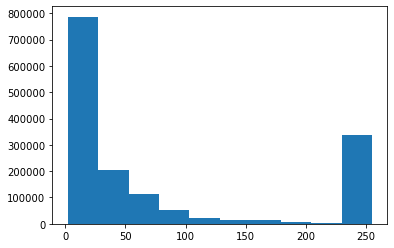

In [27]:
plt.hist(img[:,:,:].flatten())

In [7]:
sd = torch.load("/home/beans/Downloads/sam_vit_b_01ec64.pth")

In [8]:
ps = glob.glob("/media/ssd2/waymo/camera_image/*")
semseg_paths = glob.glob("/media/ssd2/waymo/camera_segmentation/*")
len(ps), len(semseg_paths) #TODO align when have semseg

(799, 799)

In [81]:
%%time

base_path = "/media/ssd2/waymo/processed"
for ix in range(len(ps)):
#for ix in range(30):
    print("run", ix)
    df_img = pd.read_parquet(ps[ix])
    df_seg = pd.read_parquet(semseg_paths[ix])
    
    # seg_masks = df_seg["[CameraSegmentationLabelComponent].panoptic_label"]
    # if len(seg_masks) == 0: continue
        
    n_imgs = len(df_img)
    for i in range(0, n_imgs, 300):
        print(i)
        image_bytes = df_img["[CameraImageComponent].image"].iloc[i]
        image = Image.open(BytesIO(image_bytes))
        aspect_ratio = image.width / image.height
        new_height = int(IMG_WIDTH / aspect_ratio)
        image = image.resize((IMG_WIDTH, new_height))
        image.save(f"{base_path}/img_{ix}_{i}.jpg")

run 0
0
300
600
900
run 1
0
300
600
900
run 2
0
300
600
900
run 3
0
300
600
900
run 4
0
300
600
900
run 5
0
300
600
900
run 6
0
300
600
900
run 7
0
300
600
900
run 8
0
300
600
900
run 9
0
300
600
900
run 10
0
300
600
900
run 11
0
300
600
900
run 12
0
300
600
900
run 13
0
300
600
900
run 14
0
300
600
900
run 15
0
300
600
900
run 16
0
300
600
900
run 17
0
300
600
900
run 18
0
300
600
900
run 19
0
300
600
900
run 20
0
300
600
900
run 21
0
300
600
900
run 22
0
300
600
900
run 23
0
300
600
900
run 24
0
300
600
900
run 25
0
300
600
900
run 26
0
300
600
900
run 27
0
300
600
900
run 28
0
300
600
900
run 29
0
300
600
900
run 30
0
300
600
900
run 31
0
300
600
900
run 32
0
300
600
900
run 33
0
300
600
900
run 34
0
300
600
900
run 35
0
300
600
900
run 36
0
300
600
900
run 37
0
300
600
900
run 38
0
300
600
900
run 39
0
300
600
900
run 40
0
300
600
900
run 41
0
300
600
900
run 42
0
300
600
900
run 43
0
300
600
900
run 44
0
300
600
900
run 45
0
300
600
900
run 46
0
300
600
900
run 47
0
300
600
900
ru

OSError: Tried reading 91949577 bytes starting at position 4759 from file but only got 9658790

In [77]:
ix = 23
df_img = pd.read_parquet(ps[ix])
df_seg = pd.read_parquet(semseg_paths[ix])
df_img.shape, df_seg.shape

((995, 15), (100, 10))

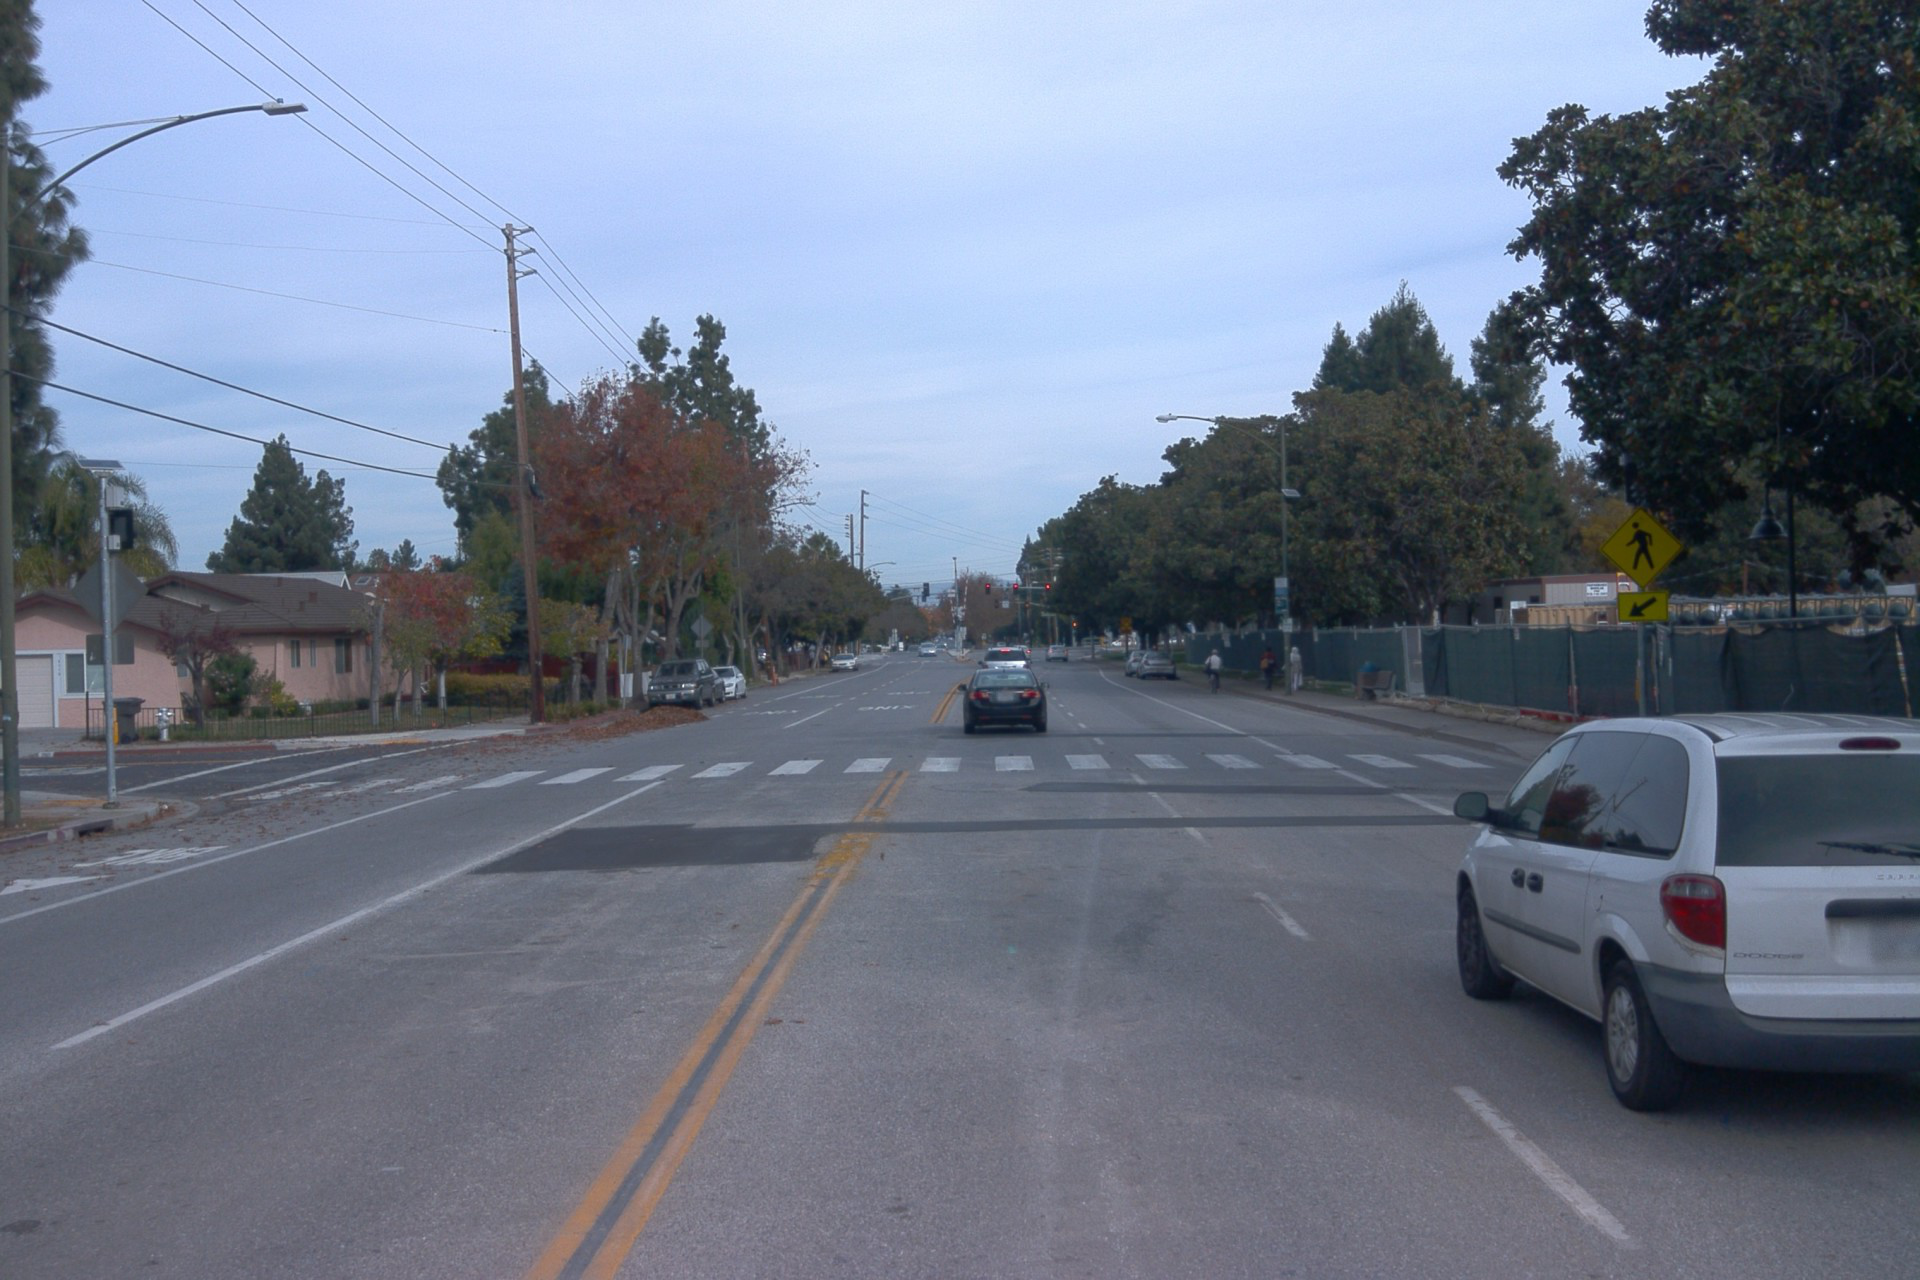

In [76]:
from PIL import Image
from io import BytesIO

image_bytes = df_img["[CameraImageComponent].image"].iloc[5]

image = Image.open(BytesIO(image_bytes))
image

In [67]:
w = 1440
aspect_ratio = image.width / image.height
new_height = int(w / aspect_ratio)

# Resize the image with the new dimensions
image = image.resize((w, new_height))
image

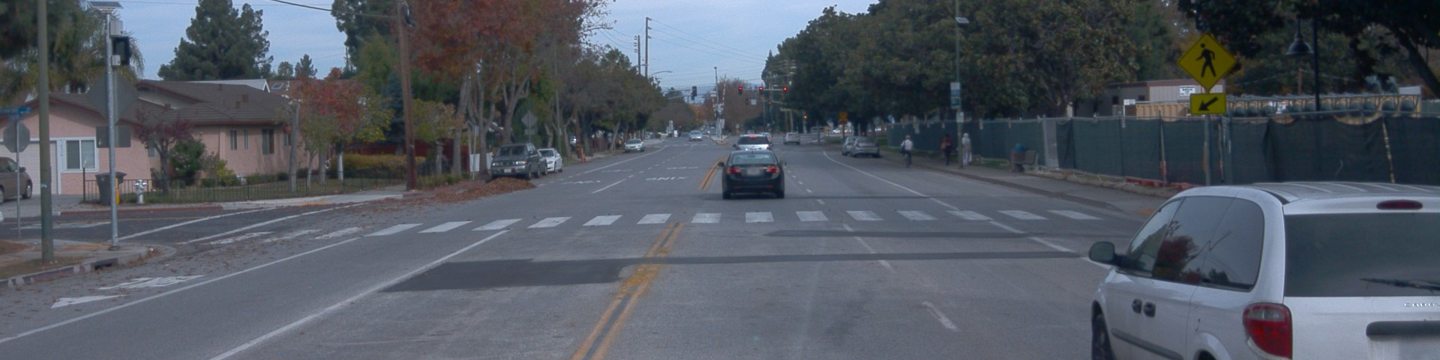

In [68]:
# crop
# t = 350
# image_cropped = image.crop((0, t, IMG_WIDTH, t+IMG_HEIGHT))
# image_cropped

In [ ]:
path = 
image.save(path)

In [72]:
len(df_seg["[CameraSegmentationLabelComponent].panoptic_label"])

0

In [11]:
seg_bytes = df_seg["[CameraSegmentationLabelComponent].panoptic_label"].iloc[60]
seg = Image.open(BytesIO(seg_bytes))
seg

IndexError: single positional indexer is out-of-bounds

In [123]:
_in = torch.randn((6, 1792, 16,16))

In [124]:
d(_in).shape

torch.Size([6, 3, 64, 64])

In [148]:
torch.tensor(-1).sigmoid()

tensor(0.2689)

In [22]:
AUX_TARGET_PROPS

['has_stop',
 'stop_dist',
 'has_lead',
 'lead_dist',
 'lead_speed',
 'dagger_shift',
 'lane_width',
 'rd_is_lined',
 'left_turn',
 'right_turn']

In [25]:
t = torch.randn((3,4))
#t[0][0] = torch.nan

In [26]:
t

tensor([[ 0.2975, -0.2322,  0.6170, -1.9155],
        [ 0.2445, -0.2613,  0.3131, -1.1126],
        [ 0.0133,  1.9001,  0.7474,  0.5937]])

In [27]:
v, ix = torch.cummax(t, -1)

In [28]:
v

tensor([[0.2975, 0.2975, 0.6170, 0.6170],
        [0.2445, 0.2445, 0.3131, 0.3131],
        [0.0133, 1.9001, 1.9001, 1.9001]])

In [29]:
v.numpy()

array([[0.2974836 , 0.2974836 , 0.61702055, 0.61702055],
       [0.24450064, 0.24450064, 0.31308305, 0.31308305],
       [0.0132695 , 1.900104  , 1.900104  , 1.900104  ]], dtype=float32)

In [30]:
t.shape

torch.Size([3, 4])

In [31]:
t.unsqueeze(-1).expand((-1,-1,N_WPS)).shape

torch.Size([3, 4, 30])

In [32]:
t.dtype

torch.float32

In [33]:
t.median()

tensor(0.2445)

In [14]:
torch.clamp(t, -10, 10)

tensor([[    nan, -1.5429,  0.1730,  0.5194],
        [ 0.1227,  0.5840, -0.0233,  1.5951],
        [ 0.2951,  0.9193,  0.8300,  0.7739]])

In [16]:
(t > 0) & (t < 2)

tensor([[False, False,  True,  True],
        [ True,  True, False,  True],
        [ True,  True,  True,  True]], device='cuda:0')

In [6]:
~(t>0)*t

tensor([[    nan,  0.0000, -0.7175,  0.0000],
        [-0.2323, -1.4721,  0.0000, -0.9467],
        [-0.7206,  0.0000, -0.6977,  0.0000]])

In [15]:
a = np.random.randn(5)
a

array([ 0.14391463,  0.45031021, -1.03211134,  0.53509931, -1.09720751])

In [21]:
np.where(a<-40)[0]

array([], dtype=int64)

In [28]:
# Shut down loader
#set_loader_should_stop(True)

In [11]:
a = np.zeros(10)

In [13]:
a[3] = 1
a[4] = 1
a

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0.])

In [16]:
np.where(a==1)[0][-1]

4

In [119]:
# Check that imgs are identical after reset scene and reset ap, tm, etc.
diffs = []
should_stop = False
for dataloader_ix in range(0, N_RUNNERS):
    for run_ix in range(20): #NOTE have to update this
        bev_paths = sorted(glob.glob(f"/media/ssd2/blender_membank_frameskip/dataloader_0{dataloader_ix}/run_{run_ix}/imgs_bev/*"))
        img_paths = sorted(glob.glob(f"/media/ssd2/blender_membank_frameskip/dataloader_0{dataloader_ix}/run_{run_ix}/imgs/*"))
        print(dataloader_ix, run_ix, len(bev_paths), len(img_paths))

        for bev_path, img_path in zip(bev_paths, img_paths):
            bev = cv2.imread(bev_path)[:,:,::-1]
            img = cv2.imread(img_path)[:,:,::-1]  
            diff = abs((bev - img)).sum()
            if diff > 0:
                print("GOT DISCREPANCY", diff)
                diffs.append(diff)
                #should_stop=True
                _s = np.concatenate([img, bev, abs(img-bev)], axis=0)
                frame = img_path.split("/")[-1].split(".")[0]
                plt.imsave(f"{BESPOKE_ROOT}/tmp/reset_check/{dataloader_ix}_{run_ix}_{frame}.jpg", _s)
                #break
        if should_stop: break
    if should_stop:break
                

0 0 170 170
0 1 170 170
0 2 170 170
GOT DISCREPANCY 678177
GOT DISCREPANCY 673064
GOT DISCREPANCY 749545
GOT DISCREPANCY 758080
GOT DISCREPANCY 743512
GOT DISCREPANCY 537669
GOT DISCREPANCY 573742
GOT DISCREPANCY 809074
GOT DISCREPANCY 806575
GOT DISCREPANCY 751496
GOT DISCREPANCY 886099
GOT DISCREPANCY 827204
GOT DISCREPANCY 754388
GOT DISCREPANCY 623792
GOT DISCREPANCY 933282
GOT DISCREPANCY 882531
GOT DISCREPANCY 782242
GOT DISCREPANCY 529291
GOT DISCREPANCY 536926
GOT DISCREPANCY 587228
GOT DISCREPANCY 569046
GOT DISCREPANCY 590404
GOT DISCREPANCY 663866
GOT DISCREPANCY 774367
GOT DISCREPANCY 742281
GOT DISCREPANCY 778762
GOT DISCREPANCY 1084056
GOT DISCREPANCY 1016552
GOT DISCREPANCY 962857
GOT DISCREPANCY 933312
GOT DISCREPANCY 921156
GOT DISCREPANCY 877873
GOT DISCREPANCY 720260
GOT DISCREPANCY 634326
GOT DISCREPANCY 492688
GOT DISCREPANCY 262895
GOT DISCREPANCY 403241
GOT DISCREPANCY 349506
GOT DISCREPANCY 426583
GOT DISCREPANCY 923886
GOT DISCREPANCY 652145
GOT DISCREPANCY 518

GOT DISCREPANCY 1408041
GOT DISCREPANCY 1364990
GOT DISCREPANCY 1244504
GOT DISCREPANCY 1241384
GOT DISCREPANCY 1196170
GOT DISCREPANCY 1313931
GOT DISCREPANCY 1703478
GOT DISCREPANCY 1856562
GOT DISCREPANCY 1867699
GOT DISCREPANCY 1610702
GOT DISCREPANCY 1339635
GOT DISCREPANCY 1281045
GOT DISCREPANCY 1220570
GOT DISCREPANCY 1204838
GOT DISCREPANCY 1141853
GOT DISCREPANCY 1170932
GOT DISCREPANCY 1142029
GOT DISCREPANCY 1132727
GOT DISCREPANCY 1231806
GOT DISCREPANCY 1294471
GOT DISCREPANCY 1290608
GOT DISCREPANCY 1222037
GOT DISCREPANCY 1292387
GOT DISCREPANCY 1339145
GOT DISCREPANCY 1350411
GOT DISCREPANCY 1405858
GOT DISCREPANCY 1415688
GOT DISCREPANCY 1345750
GOT DISCREPANCY 1406525
GOT DISCREPANCY 1349283
GOT DISCREPANCY 1333537
GOT DISCREPANCY 1499746
GOT DISCREPANCY 1513340
GOT DISCREPANCY 1507201
GOT DISCREPANCY 1514536
GOT DISCREPANCY 1194177
GOT DISCREPANCY 1212583
GOT DISCREPANCY 1360425
GOT DISCREPANCY 1284459
GOT DISCREPANCY 1313367
GOT DISCREPANCY 1396882
GOT DISCREPANCY 

GOT DISCREPANCY 1813527
GOT DISCREPANCY 1848552
GOT DISCREPANCY 1822854
GOT DISCREPANCY 1791151
GOT DISCREPANCY 1774659
GOT DISCREPANCY 1755727
GOT DISCREPANCY 2009170
GOT DISCREPANCY 2556095
GOT DISCREPANCY 2787236
GOT DISCREPANCY 2610239
GOT DISCREPANCY 2414732
GOT DISCREPANCY 2311512
GOT DISCREPANCY 2077407
GOT DISCREPANCY 1879134
GOT DISCREPANCY 1660648
GOT DISCREPANCY 1493401
GOT DISCREPANCY 1148810
GOT DISCREPANCY 1102199
GOT DISCREPANCY 1014820
GOT DISCREPANCY 1208063
GOT DISCREPANCY 1677099
GOT DISCREPANCY 1795720
GOT DISCREPANCY 1701898
GOT DISCREPANCY 1606790
GOT DISCREPANCY 1614302
GOT DISCREPANCY 1682066
GOT DISCREPANCY 1766290
GOT DISCREPANCY 1697762
GOT DISCREPANCY 1809018
GOT DISCREPANCY 1794913
GOT DISCREPANCY 1931163
GOT DISCREPANCY 2016783
GOT DISCREPANCY 2046008
GOT DISCREPANCY 2065168
GOT DISCREPANCY 1971183
GOT DISCREPANCY 1856625
GOT DISCREPANCY 1886996
GOT DISCREPANCY 1910916
GOT DISCREPANCY 1925223
GOT DISCREPANCY 1701265
GOT DISCREPANCY 1592089
GOT DISCREPANCY 

GOT DISCREPANCY 1103644
GOT DISCREPANCY 1043000
GOT DISCREPANCY 1414635
GOT DISCREPANCY 1510832
GOT DISCREPANCY 1688853
GOT DISCREPANCY 1816267
GOT DISCREPANCY 1858152
GOT DISCREPANCY 1845443
GOT DISCREPANCY 1803179
GOT DISCREPANCY 1820830
GOT DISCREPANCY 1697304
GOT DISCREPANCY 1694581
GOT DISCREPANCY 1651945
GOT DISCREPANCY 1585920
GOT DISCREPANCY 1542237
GOT DISCREPANCY 1369004
GOT DISCREPANCY 735183
GOT DISCREPANCY 257051
GOT DISCREPANCY 47632
GOT DISCREPANCY 743519
GOT DISCREPANCY 1679105
GOT DISCREPANCY 1224188
GOT DISCREPANCY 1262646
GOT DISCREPANCY 1280879
GOT DISCREPANCY 1373271
GOT DISCREPANCY 1328185
GOT DISCREPANCY 1293505
GOT DISCREPANCY 1320498
GOT DISCREPANCY 1231706
GOT DISCREPANCY 1517967
GOT DISCREPANCY 1366218
GOT DISCREPANCY 1447261
GOT DISCREPANCY 1422487
GOT DISCREPANCY 1422161
GOT DISCREPANCY 1363837
GOT DISCREPANCY 1329235
GOT DISCREPANCY 1444841
GOT DISCREPANCY 1453604
GOT DISCREPANCY 1470840
GOT DISCREPANCY 1471791
GOT DISCREPANCY 1383036
GOT DISCREPANCY 14018

GOT DISCREPANCY 3203672
GOT DISCREPANCY 3141735
GOT DISCREPANCY 3184281
GOT DISCREPANCY 3008530
GOT DISCREPANCY 3018245
GOT DISCREPANCY 3025905
GOT DISCREPANCY 3015005
GOT DISCREPANCY 3036686
GOT DISCREPANCY 3058849
GOT DISCREPANCY 3005591
GOT DISCREPANCY 2969662
GOT DISCREPANCY 3007782
GOT DISCREPANCY 3013566
GOT DISCREPANCY 2821252
GOT DISCREPANCY 2820386
GOT DISCREPANCY 3007563
GOT DISCREPANCY 2985672
GOT DISCREPANCY 2998953
GOT DISCREPANCY 2825282
GOT DISCREPANCY 2929289
GOT DISCREPANCY 2929140
GOT DISCREPANCY 2851568
GOT DISCREPANCY 2816161
GOT DISCREPANCY 2655252
GOT DISCREPANCY 2483776
GOT DISCREPANCY 2356227
GOT DISCREPANCY 2378609
GOT DISCREPANCY 2396525
GOT DISCREPANCY 2475299
GOT DISCREPANCY 2495320
GOT DISCREPANCY 2510701
GOT DISCREPANCY 2480496
GOT DISCREPANCY 2508098
GOT DISCREPANCY 2441522
GOT DISCREPANCY 2471901
GOT DISCREPANCY 2426439
GOT DISCREPANCY 2420639
GOT DISCREPANCY 2301982
GOT DISCREPANCY 2376041
GOT DISCREPANCY 2537774
GOT DISCREPANCY 2660496
GOT DISCREPANCY 

GOT DISCREPANCY 2409476
GOT DISCREPANCY 2369964
GOT DISCREPANCY 2382967
GOT DISCREPANCY 2411146
GOT DISCREPANCY 2352784
GOT DISCREPANCY 2344211
GOT DISCREPANCY 2350269
GOT DISCREPANCY 2376610
GOT DISCREPANCY 2521011
GOT DISCREPANCY 2450408
GOT DISCREPANCY 2556494
GOT DISCREPANCY 2499673
GOT DISCREPANCY 2468332
GOT DISCREPANCY 2575549
GOT DISCREPANCY 2598965
GOT DISCREPANCY 2616916
GOT DISCREPANCY 2639125
GOT DISCREPANCY 2663584
GOT DISCREPANCY 2599587
GOT DISCREPANCY 2591283
GOT DISCREPANCY 2398173
GOT DISCREPANCY 2615878
GOT DISCREPANCY 2615777
GOT DISCREPANCY 2699284
GOT DISCREPANCY 2567342
GOT DISCREPANCY 2553479
GOT DISCREPANCY 2505434
GOT DISCREPANCY 2663893
GOT DISCREPANCY 2608825
GOT DISCREPANCY 2624444
GOT DISCREPANCY 2642242
GOT DISCREPANCY 2680533
GOT DISCREPANCY 2542937
GOT DISCREPANCY 2722309
GOT DISCREPANCY 2472473
GOT DISCREPANCY 2761667
GOT DISCREPANCY 2896219
GOT DISCREPANCY 2878536
GOT DISCREPANCY 2683629
GOT DISCREPANCY 2630429
GOT DISCREPANCY 2552941
GOT DISCREPANCY 

GOT DISCREPANCY 2652628
GOT DISCREPANCY 2764746
GOT DISCREPANCY 2795723
GOT DISCREPANCY 2936473
GOT DISCREPANCY 2950147
GOT DISCREPANCY 3002408
GOT DISCREPANCY 3126638
GOT DISCREPANCY 3039767
GOT DISCREPANCY 3151731
GOT DISCREPANCY 3106371
GOT DISCREPANCY 3207487
GOT DISCREPANCY 3065945
GOT DISCREPANCY 3239076
GOT DISCREPANCY 3194614
GOT DISCREPANCY 3311030
GOT DISCREPANCY 3505467
GOT DISCREPANCY 3063363
GOT DISCREPANCY 2713254
GOT DISCREPANCY 2648795
GOT DISCREPANCY 2601857
GOT DISCREPANCY 2584959
GOT DISCREPANCY 2612491
GOT DISCREPANCY 2613456
GOT DISCREPANCY 2650037
GOT DISCREPANCY 2654010
GOT DISCREPANCY 2680324
GOT DISCREPANCY 2600115
GOT DISCREPANCY 2510899
GOT DISCREPANCY 2552575
GOT DISCREPANCY 2584788
GOT DISCREPANCY 2549865
GOT DISCREPANCY 2752361
GOT DISCREPANCY 2685611
GOT DISCREPANCY 2818284
GOT DISCREPANCY 2675097
GOT DISCREPANCY 2951897
GOT DISCREPANCY 2994137
GOT DISCREPANCY 2973747
GOT DISCREPANCY 2966946
GOT DISCREPANCY 2981447
GOT DISCREPANCY 2918776
GOT DISCREPANCY 

GOT DISCREPANCY 3132949
GOT DISCREPANCY 3108826
GOT DISCREPANCY 2947989
GOT DISCREPANCY 2832503
GOT DISCREPANCY 2593014
GOT DISCREPANCY 2344321
GOT DISCREPANCY 2561458
GOT DISCREPANCY 2804389
GOT DISCREPANCY 2897904
GOT DISCREPANCY 2849686
GOT DISCREPANCY 3001644
GOT DISCREPANCY 2886465
GOT DISCREPANCY 2859091
GOT DISCREPANCY 2923542
GOT DISCREPANCY 3057237
GOT DISCREPANCY 3010568
GOT DISCREPANCY 3145313
GOT DISCREPANCY 3114834
GOT DISCREPANCY 3084442
GOT DISCREPANCY 3163672
GOT DISCREPANCY 2994283
GOT DISCREPANCY 2941193
GOT DISCREPANCY 2896642
GOT DISCREPANCY 2914984
GOT DISCREPANCY 2882586
GOT DISCREPANCY 2843419
GOT DISCREPANCY 2690296
GOT DISCREPANCY 2766989
GOT DISCREPANCY 2723389
GOT DISCREPANCY 2657205
GOT DISCREPANCY 2667808
GOT DISCREPANCY 2541523
GOT DISCREPANCY 2696700
GOT DISCREPANCY 2720706
GOT DISCREPANCY 2814618
GOT DISCREPANCY 2698627
GOT DISCREPANCY 2741550
GOT DISCREPANCY 2799732
GOT DISCREPANCY 2708375
GOT DISCREPANCY 2617265
GOT DISCREPANCY 2517455
GOT DISCREPANCY 

GOT DISCREPANCY 2697028
GOT DISCREPANCY 2692989
GOT DISCREPANCY 2813548
GOT DISCREPANCY 2914523
GOT DISCREPANCY 2993887
GOT DISCREPANCY 3114803
GOT DISCREPANCY 3228209
GOT DISCREPANCY 3149913
GOT DISCREPANCY 3177273
GOT DISCREPANCY 3184769
GOT DISCREPANCY 3070288
GOT DISCREPANCY 3096290
GOT DISCREPANCY 3078162
GOT DISCREPANCY 3094249
GOT DISCREPANCY 3099967
GOT DISCREPANCY 3112469
GOT DISCREPANCY 3012990
GOT DISCREPANCY 2838098
GOT DISCREPANCY 2818660
GOT DISCREPANCY 2855601
GOT DISCREPANCY 2786155
GOT DISCREPANCY 2684198
GOT DISCREPANCY 2750545
GOT DISCREPANCY 2619220
GOT DISCREPANCY 2812681
GOT DISCREPANCY 2821170
GOT DISCREPANCY 2988548
GOT DISCREPANCY 3103035
GOT DISCREPANCY 3160800
GOT DISCREPANCY 3231638
GOT DISCREPANCY 3307662
GOT DISCREPANCY 3357449
GOT DISCREPANCY 3386823
GOT DISCREPANCY 3414503
GOT DISCREPANCY 3638743
GOT DISCREPANCY 3559812
GOT DISCREPANCY 3465236
GOT DISCREPANCY 3538239
GOT DISCREPANCY 3310100
GOT DISCREPANCY 3158213
GOT DISCREPANCY 2952985
GOT DISCREPANCY 

GOT DISCREPANCY 2524271
GOT DISCREPANCY 2500455
GOT DISCREPANCY 2601447
GOT DISCREPANCY 2613935
GOT DISCREPANCY 2665752
GOT DISCREPANCY 2767273
GOT DISCREPANCY 2774937
GOT DISCREPANCY 2820783
GOT DISCREPANCY 2661471
GOT DISCREPANCY 2595050
GOT DISCREPANCY 2748499
GOT DISCREPANCY 2731480
GOT DISCREPANCY 2693363
GOT DISCREPANCY 2703723
GOT DISCREPANCY 2681362
GOT DISCREPANCY 2632154
GOT DISCREPANCY 2591494
GOT DISCREPANCY 2495324
GOT DISCREPANCY 2483112
GOT DISCREPANCY 2482914
GOT DISCREPANCY 2593556
GOT DISCREPANCY 2553224
GOT DISCREPANCY 2762945
GOT DISCREPANCY 2731581
GOT DISCREPANCY 2550842
GOT DISCREPANCY 2382618
GOT DISCREPANCY 2494351
GOT DISCREPANCY 2432024
GOT DISCREPANCY 2300713
GOT DISCREPANCY 2365559
GOT DISCREPANCY 2532489
1 4 170 170
GOT DISCREPANCY 1769500
GOT DISCREPANCY 1824748
GOT DISCREPANCY 1808476
GOT DISCREPANCY 1731382
GOT DISCREPANCY 1655897
GOT DISCREPANCY 1833246
GOT DISCREPANCY 1786979
GOT DISCREPANCY 1907574
GOT DISCREPANCY 2059130
GOT DISCREPANCY 2010693
GOT 

GOT DISCREPANCY 1836088
GOT DISCREPANCY 1908654
GOT DISCREPANCY 1824001
GOT DISCREPANCY 1870347
GOT DISCREPANCY 1796960
GOT DISCREPANCY 1912287
1 6 170 170
GOT DISCREPANCY 2708758
GOT DISCREPANCY 2848620
GOT DISCREPANCY 2805269
GOT DISCREPANCY 2677736
GOT DISCREPANCY 2499549
GOT DISCREPANCY 2291682
GOT DISCREPANCY 2280354
GOT DISCREPANCY 2330378
GOT DISCREPANCY 2299620
GOT DISCREPANCY 2306034
GOT DISCREPANCY 2364674
GOT DISCREPANCY 2242534
GOT DISCREPANCY 2201025
GOT DISCREPANCY 2184507
GOT DISCREPANCY 2151864
GOT DISCREPANCY 2233623
GOT DISCREPANCY 2235326
GOT DISCREPANCY 2272612
GOT DISCREPANCY 2395436
GOT DISCREPANCY 2704035
GOT DISCREPANCY 2839023
GOT DISCREPANCY 2916950
GOT DISCREPANCY 2978787
GOT DISCREPANCY 2928862
GOT DISCREPANCY 2851843
GOT DISCREPANCY 2682028
GOT DISCREPANCY 2456341
GOT DISCREPANCY 2351714
GOT DISCREPANCY 2277777
GOT DISCREPANCY 2290396
GOT DISCREPANCY 2315867
GOT DISCREPANCY 2348051
GOT DISCREPANCY 2374643
GOT DISCREPANCY 2419593
GOT DISCREPANCY 2389593
GOT 

GOT DISCREPANCY 3185503
GOT DISCREPANCY 3075494
GOT DISCREPANCY 2954660
GOT DISCREPANCY 2762067
GOT DISCREPANCY 2749226
GOT DISCREPANCY 2576845
GOT DISCREPANCY 2540720
GOT DISCREPANCY 2553266
GOT DISCREPANCY 2583199
GOT DISCREPANCY 2563813
GOT DISCREPANCY 2692188
GOT DISCREPANCY 2656516
GOT DISCREPANCY 2485289
GOT DISCREPANCY 2395283
GOT DISCREPANCY 2438996
GOT DISCREPANCY 2528913
GOT DISCREPANCY 2778039
GOT DISCREPANCY 2865785
GOT DISCREPANCY 2825851
GOT DISCREPANCY 3040333
GOT DISCREPANCY 2931415
GOT DISCREPANCY 3054845
GOT DISCREPANCY 3100766
GOT DISCREPANCY 3076671
GOT DISCREPANCY 3175146
GOT DISCREPANCY 3040739
GOT DISCREPANCY 3138563
GOT DISCREPANCY 3184712
GOT DISCREPANCY 3127168
GOT DISCREPANCY 3258217
GOT DISCREPANCY 2865733
GOT DISCREPANCY 3056023
GOT DISCREPANCY 3113024
GOT DISCREPANCY 3009705
GOT DISCREPANCY 2680700
GOT DISCREPANCY 2703430
GOT DISCREPANCY 2702148
GOT DISCREPANCY 2600389
GOT DISCREPANCY 2549958
GOT DISCREPANCY 2497953
GOT DISCREPANCY 2797098
GOT DISCREPANCY 

GOT DISCREPANCY 2773950
GOT DISCREPANCY 2638551
GOT DISCREPANCY 2721918
GOT DISCREPANCY 2817088
GOT DISCREPANCY 2658474
GOT DISCREPANCY 2539727
GOT DISCREPANCY 2473772
GOT DISCREPANCY 2359016
GOT DISCREPANCY 2262273
GOT DISCREPANCY 2316839
GOT DISCREPANCY 2256841
GOT DISCREPANCY 2447950
GOT DISCREPANCY 2211814
GOT DISCREPANCY 2097530
GOT DISCREPANCY 2410388
GOT DISCREPANCY 2653603
GOT DISCREPANCY 2826051
GOT DISCREPANCY 2873418
GOT DISCREPANCY 2803351
GOT DISCREPANCY 2642535
GOT DISCREPANCY 2596140
GOT DISCREPANCY 2583324
GOT DISCREPANCY 2723261
GOT DISCREPANCY 2687906
GOT DISCREPANCY 2627036
GOT DISCREPANCY 2457374
GOT DISCREPANCY 2416198
GOT DISCREPANCY 2327807
GOT DISCREPANCY 2416434
GOT DISCREPANCY 2719559
GOT DISCREPANCY 2622642
GOT DISCREPANCY 2658410
GOT DISCREPANCY 2630386
GOT DISCREPANCY 2724906
GOT DISCREPANCY 2828675
GOT DISCREPANCY 2773227
GOT DISCREPANCY 2781195
GOT DISCREPANCY 2714146
GOT DISCREPANCY 2723341
GOT DISCREPANCY 2719883
GOT DISCREPANCY 2740685
GOT DISCREPANCY 

GOT DISCREPANCY 813636
GOT DISCREPANCY 701075
GOT DISCREPANCY 1093694
GOT DISCREPANCY 1120678
GOT DISCREPANCY 1076803
GOT DISCREPANCY 1017741
GOT DISCREPANCY 1042066
GOT DISCREPANCY 898931
GOT DISCREPANCY 788234
GOT DISCREPANCY 600490
GOT DISCREPANCY 377540
GOT DISCREPANCY 320939
GOT DISCREPANCY 137585
GOT DISCREPANCY 741983
GOT DISCREPANCY 445677
GOT DISCREPANCY 706722
GOT DISCREPANCY 749251
GOT DISCREPANCY 801023
GOT DISCREPANCY 954429
GOT DISCREPANCY 795987
GOT DISCREPANCY 626145
GOT DISCREPANCY 524512
GOT DISCREPANCY 589403
GOT DISCREPANCY 532723
GOT DISCREPANCY 935396
GOT DISCREPANCY 1155098
GOT DISCREPANCY 1047407
GOT DISCREPANCY 972978
GOT DISCREPANCY 859044
GOT DISCREPANCY 877907
GOT DISCREPANCY 660715
GOT DISCREPANCY 729908
GOT DISCREPANCY 841667
GOT DISCREPANCY 529498
GOT DISCREPANCY 516974
GOT DISCREPANCY 542858
GOT DISCREPANCY 550948
GOT DISCREPANCY 608153
GOT DISCREPANCY 559302
GOT DISCREPANCY 506499
GOT DISCREPANCY 531236
GOT DISCREPANCY 572179
GOT DISCREPANCY 647603
GOT 

GOT DISCREPANCY 2545492
GOT DISCREPANCY 2437888
GOT DISCREPANCY 2267440
GOT DISCREPANCY 2374226
GOT DISCREPANCY 2512313
GOT DISCREPANCY 2428995
GOT DISCREPANCY 2246767
GOT DISCREPANCY 1961281
GOT DISCREPANCY 2098827
GOT DISCREPANCY 1923476
GOT DISCREPANCY 1938461
GOT DISCREPANCY 2166268
GOT DISCREPANCY 2277313
GOT DISCREPANCY 2291880
GOT DISCREPANCY 2131381
GOT DISCREPANCY 2238370
GOT DISCREPANCY 2289486
GOT DISCREPANCY 2308070
GOT DISCREPANCY 2359128
GOT DISCREPANCY 2326075
GOT DISCREPANCY 2299055
GOT DISCREPANCY 2336541
GOT DISCREPANCY 2344949
GOT DISCREPANCY 2334150
GOT DISCREPANCY 2308663
GOT DISCREPANCY 2308663
GOT DISCREPANCY 2308663
GOT DISCREPANCY 2308663
GOT DISCREPANCY 2308663
GOT DISCREPANCY 2308663
GOT DISCREPANCY 2277719
GOT DISCREPANCY 2346676
GOT DISCREPANCY 2355708
GOT DISCREPANCY 2354194
GOT DISCREPANCY 2424882
GOT DISCREPANCY 2423863
GOT DISCREPANCY 2462247
GOT DISCREPANCY 2492873
GOT DISCREPANCY 2348325
GOT DISCREPANCY 2297421
GOT DISCREPANCY 2337848
GOT DISCREPANCY 

GOT DISCREPANCY 155973
GOT DISCREPANCY 193390
GOT DISCREPANCY 813917
GOT DISCREPANCY 1040162
GOT DISCREPANCY 642987
GOT DISCREPANCY 811211
GOT DISCREPANCY 839631
GOT DISCREPANCY 866915
GOT DISCREPANCY 768899
GOT DISCREPANCY 827971
GOT DISCREPANCY 803416
GOT DISCREPANCY 726638
GOT DISCREPANCY 901236
GOT DISCREPANCY 828477
GOT DISCREPANCY 813972
GOT DISCREPANCY 820273
GOT DISCREPANCY 707710
GOT DISCREPANCY 799805
GOT DISCREPANCY 688328
GOT DISCREPANCY 214081
GOT DISCREPANCY 690527
GOT DISCREPANCY 1033228
GOT DISCREPANCY 550817
GOT DISCREPANCY 621237
GOT DISCREPANCY 445001
GOT DISCREPANCY 526955
GOT DISCREPANCY 680213
GOT DISCREPANCY 654806
GOT DISCREPANCY 712396
GOT DISCREPANCY 846911
GOT DISCREPANCY 894430
GOT DISCREPANCY 762243
GOT DISCREPANCY 568886
GOT DISCREPANCY 422108
GOT DISCREPANCY 490189
GOT DISCREPANCY 304320
GOT DISCREPANCY 360774
GOT DISCREPANCY 465684
GOT DISCREPANCY 359845
GOT DISCREPANCY 332907
GOT DISCREPANCY 328151
GOT DISCREPANCY 395515
GOT DISCREPANCY 434923
GOT DISCR

GOT DISCREPANCY 1790744
GOT DISCREPANCY 1976727
GOT DISCREPANCY 1967152
GOT DISCREPANCY 2046402
GOT DISCREPANCY 2082783
GOT DISCREPANCY 2105974
GOT DISCREPANCY 2073133
GOT DISCREPANCY 2127671
GOT DISCREPANCY 2253066
GOT DISCREPANCY 2242665
GOT DISCREPANCY 2255308
GOT DISCREPANCY 2286945
GOT DISCREPANCY 2299250
GOT DISCREPANCY 2279847
GOT DISCREPANCY 2442646
GOT DISCREPANCY 2583807
GOT DISCREPANCY 2511934
GOT DISCREPANCY 2479365
GOT DISCREPANCY 2443263
GOT DISCREPANCY 2354010
GOT DISCREPANCY 2471830
GOT DISCREPANCY 2683805
GOT DISCREPANCY 2533004
GOT DISCREPANCY 2539301
GOT DISCREPANCY 2511580
GOT DISCREPANCY 2398340
GOT DISCREPANCY 2426155
GOT DISCREPANCY 2455488
GOT DISCREPANCY 2276922
GOT DISCREPANCY 2254184
GOT DISCREPANCY 2241194
GOT DISCREPANCY 2225954
GOT DISCREPANCY 2252573
GOT DISCREPANCY 2551408
GOT DISCREPANCY 2820056
GOT DISCREPANCY 2845660
GOT DISCREPANCY 2726920
GOT DISCREPANCY 2612134
GOT DISCREPANCY 2608307
GOT DISCREPANCY 2426370
GOT DISCREPANCY 2574541
GOT DISCREPANCY 

GOT DISCREPANCY 2200742
GOT DISCREPANCY 2201810
GOT DISCREPANCY 2230214
GOT DISCREPANCY 2102171
GOT DISCREPANCY 2058302
GOT DISCREPANCY 2072539
GOT DISCREPANCY 2007028
GOT DISCREPANCY 2103845
GOT DISCREPANCY 2168055
GOT DISCREPANCY 2060096
GOT DISCREPANCY 2132006
GOT DISCREPANCY 2165983
GOT DISCREPANCY 2271824
GOT DISCREPANCY 2291824
GOT DISCREPANCY 2231252
GOT DISCREPANCY 2135002
GOT DISCREPANCY 2329360
GOT DISCREPANCY 2299516
GOT DISCREPANCY 2106429
GOT DISCREPANCY 2113454
GOT DISCREPANCY 2162199
GOT DISCREPANCY 2097432
GOT DISCREPANCY 2161172
GOT DISCREPANCY 2282899
GOT DISCREPANCY 2107126
GOT DISCREPANCY 2198032
GOT DISCREPANCY 2187313
GOT DISCREPANCY 2213439
GOT DISCREPANCY 2138960
GOT DISCREPANCY 2181486
GOT DISCREPANCY 2237763
GOT DISCREPANCY 2267345
2 1 170 170
2 2 170 170
GOT DISCREPANCY 1710733
GOT DISCREPANCY 1764167
GOT DISCREPANCY 1863509
GOT DISCREPANCY 1703944
GOT DISCREPANCY 1694054
GOT DISCREPANCY 1840576
GOT DISCREPANCY 1728294
GOT DISCREPANCY 1893296
GOT DISCREPANCY 

GOT DISCREPANCY 1990846
GOT DISCREPANCY 2122722
GOT DISCREPANCY 2159239
GOT DISCREPANCY 2047420
GOT DISCREPANCY 2046819
GOT DISCREPANCY 2007624
GOT DISCREPANCY 1981347
GOT DISCREPANCY 1976060
GOT DISCREPANCY 2095491
GOT DISCREPANCY 2104164
GOT DISCREPANCY 2129604
GOT DISCREPANCY 2267075
GOT DISCREPANCY 2391344
GOT DISCREPANCY 2447528
GOT DISCREPANCY 2478546
GOT DISCREPANCY 2452797
GOT DISCREPANCY 2426991
GOT DISCREPANCY 2416724
GOT DISCREPANCY 2573444
GOT DISCREPANCY 2593981
GOT DISCREPANCY 2376793
GOT DISCREPANCY 2271934
GOT DISCREPANCY 2213919
GOT DISCREPANCY 2244491
GOT DISCREPANCY 2262014
GOT DISCREPANCY 2299976
GOT DISCREPANCY 2603945
GOT DISCREPANCY 2668160
GOT DISCREPANCY 3135135
GOT DISCREPANCY 3353320
GOT DISCREPANCY 3240302
GOT DISCREPANCY 3075405
2 4 170 170
GOT DISCREPANCY 805343
GOT DISCREPANCY 1059253
GOT DISCREPANCY 954878
GOT DISCREPANCY 941294
GOT DISCREPANCY 890794
GOT DISCREPANCY 1007861
GOT DISCREPANCY 1096260
GOT DISCREPANCY 862997
GOT DISCREPANCY 757435
GOT DISCRE

GOT DISCREPANCY 2029969
GOT DISCREPANCY 2256617
GOT DISCREPANCY 2212069
GOT DISCREPANCY 2313243
GOT DISCREPANCY 2392923
GOT DISCREPANCY 2636367
GOT DISCREPANCY 2636530
GOT DISCREPANCY 2682423
GOT DISCREPANCY 2695808
GOT DISCREPANCY 2569578
GOT DISCREPANCY 2407896
GOT DISCREPANCY 2360599
GOT DISCREPANCY 2328414
GOT DISCREPANCY 2346989
GOT DISCREPANCY 2497684
GOT DISCREPANCY 2546684
GOT DISCREPANCY 2578278
GOT DISCREPANCY 2607448
GOT DISCREPANCY 2360848
GOT DISCREPANCY 2093437
GOT DISCREPANCY 2034070
GOT DISCREPANCY 1938873
GOT DISCREPANCY 1689884
GOT DISCREPANCY 2022028
GOT DISCREPANCY 2260873
GOT DISCREPANCY 2447380
GOT DISCREPANCY 2459229
GOT DISCREPANCY 2340938
GOT DISCREPANCY 2301171
GOT DISCREPANCY 2262630
GOT DISCREPANCY 2191895
GOT DISCREPANCY 2155642
GOT DISCREPANCY 2198601
GOT DISCREPANCY 2262397
GOT DISCREPANCY 2321025
GOT DISCREPANCY 2367149
GOT DISCREPANCY 2310983
GOT DISCREPANCY 2336071
GOT DISCREPANCY 2303376
GOT DISCREPANCY 2081744
GOT DISCREPANCY 1916718
GOT DISCREPANCY 

GOT DISCREPANCY 2830653
GOT DISCREPANCY 2648113
GOT DISCREPANCY 2397667
GOT DISCREPANCY 2533279
GOT DISCREPANCY 2565117
GOT DISCREPANCY 2630572
GOT DISCREPANCY 2626094
GOT DISCREPANCY 2673676
GOT DISCREPANCY 2711013
GOT DISCREPANCY 2721858
GOT DISCREPANCY 2816482
GOT DISCREPANCY 2919107
GOT DISCREPANCY 3138219
GOT DISCREPANCY 2983565
GOT DISCREPANCY 3470777
GOT DISCREPANCY 3277987
GOT DISCREPANCY 3045357
GOT DISCREPANCY 2654559
GOT DISCREPANCY 2301173
GOT DISCREPANCY 1925331
GOT DISCREPANCY 1845710
GOT DISCREPANCY 2171124
GOT DISCREPANCY 2382656
GOT DISCREPANCY 2412543
GOT DISCREPANCY 3697000
GOT DISCREPANCY 4189188
GOT DISCREPANCY 3465618
GOT DISCREPANCY 2280057
GOT DISCREPANCY 2605295
GOT DISCREPANCY 2719989
GOT DISCREPANCY 2914547
GOT DISCREPANCY 2798583
GOT DISCREPANCY 2863190
GOT DISCREPANCY 2781309
GOT DISCREPANCY 2994486
GOT DISCREPANCY 2961313
GOT DISCREPANCY 2825581
GOT DISCREPANCY 2824185
GOT DISCREPANCY 2714897
GOT DISCREPANCY 2765357
GOT DISCREPANCY 2551507
GOT DISCREPANCY 

GOT DISCREPANCY 872389
GOT DISCREPANCY 1185717
GOT DISCREPANCY 1274872
GOT DISCREPANCY 1243092
GOT DISCREPANCY 1178359
GOT DISCREPANCY 1137872
GOT DISCREPANCY 1032875
GOT DISCREPANCY 935620
GOT DISCREPANCY 878672
GOT DISCREPANCY 689111
GOT DISCREPANCY 429799
GOT DISCREPANCY 366037
GOT DISCREPANCY 355562
GOT DISCREPANCY 605315
GOT DISCREPANCY 977074
GOT DISCREPANCY 526264
GOT DISCREPANCY 590502
GOT DISCREPANCY 488612
GOT DISCREPANCY 443004
GOT DISCREPANCY 445904
GOT DISCREPANCY 444312
GOT DISCREPANCY 449638
GOT DISCREPANCY 605582
GOT DISCREPANCY 539557
GOT DISCREPANCY 644969
GOT DISCREPANCY 353431
GOT DISCREPANCY 499913
GOT DISCREPANCY 560764
GOT DISCREPANCY 527771
GOT DISCREPANCY 524860
GOT DISCREPANCY 571346
GOT DISCREPANCY 823729
GOT DISCREPANCY 623517
GOT DISCREPANCY 698572
GOT DISCREPANCY 640064
GOT DISCREPANCY 720736
GOT DISCREPANCY 520869
GOT DISCREPANCY 500320
GOT DISCREPANCY 631580
GOT DISCREPANCY 660591
GOT DISCREPANCY 584426
GOT DISCREPANCY 569755
GOT DISCREPANCY 657527
GOT D

GOT DISCREPANCY 1916958
GOT DISCREPANCY 1876787
GOT DISCREPANCY 1878331
GOT DISCREPANCY 2041046
GOT DISCREPANCY 2117284
GOT DISCREPANCY 2120624
GOT DISCREPANCY 2168355
GOT DISCREPANCY 2036066
GOT DISCREPANCY 2069417
GOT DISCREPANCY 2083774
GOT DISCREPANCY 2050892
GOT DISCREPANCY 2211070
GOT DISCREPANCY 2392330
GOT DISCREPANCY 2826317
GOT DISCREPANCY 2781897
GOT DISCREPANCY 2539281
GOT DISCREPANCY 2286781
GOT DISCREPANCY 2236658
GOT DISCREPANCY 2348757
GOT DISCREPANCY 2214124
GOT DISCREPANCY 2089382
GOT DISCREPANCY 2010685
GOT DISCREPANCY 2110161
GOT DISCREPANCY 2429542
GOT DISCREPANCY 2565243
GOT DISCREPANCY 2383401
GOT DISCREPANCY 2031084
GOT DISCREPANCY 1622934
GOT DISCREPANCY 1614265
GOT DISCREPANCY 1895402
GOT DISCREPANCY 1734481
GOT DISCREPANCY 1832422
GOT DISCREPANCY 2026403
GOT DISCREPANCY 2041484
GOT DISCREPANCY 2125486
GOT DISCREPANCY 2148150
GOT DISCREPANCY 2117663
GOT DISCREPANCY 2156408
GOT DISCREPANCY 2000495
GOT DISCREPANCY 2084073
GOT DISCREPANCY 2145364
GOT DISCREPANCY 

GOT DISCREPANCY 491852
GOT DISCREPANCY 491852
GOT DISCREPANCY 491852
GOT DISCREPANCY 619897
GOT DISCREPANCY 613429
GOT DISCREPANCY 765477
GOT DISCREPANCY 641855
GOT DISCREPANCY 700016
GOT DISCREPANCY 734797
GOT DISCREPANCY 839520
GOT DISCREPANCY 801997
GOT DISCREPANCY 687076
GOT DISCREPANCY 491852
GOT DISCREPANCY 491852
GOT DISCREPANCY 491852
GOT DISCREPANCY 491852
GOT DISCREPANCY 491852
GOT DISCREPANCY 397011
GOT DISCREPANCY 275997
GOT DISCREPANCY 291745
GOT DISCREPANCY 375792
GOT DISCREPANCY 383383
GOT DISCREPANCY 349759
GOT DISCREPANCY 371943
GOT DISCREPANCY 371795
GOT DISCREPANCY 390882
GOT DISCREPANCY 348583
GOT DISCREPANCY 362556
GOT DISCREPANCY 330748
GOT DISCREPANCY 272270
GOT DISCREPANCY 365635
GOT DISCREPANCY 500635
GOT DISCREPANCY 560641
GOT DISCREPANCY 274660
GOT DISCREPANCY 378781
GOT DISCREPANCY 321524
GOT DISCREPANCY 364085
GOT DISCREPANCY 455420
GOT DISCREPANCY 458374
GOT DISCREPANCY 490818
GOT DISCREPANCY 491067
GOT DISCREPANCY 538447
GOT DISCREPANCY 611442
GOT DISCREP

GOT DISCREPANCY 802636
GOT DISCREPANCY 732649
GOT DISCREPANCY 618856
GOT DISCREPANCY 476038
GOT DISCREPANCY 506165
GOT DISCREPANCY 304925
GOT DISCREPANCY 295388
GOT DISCREPANCY 409869
GOT DISCREPANCY 404276
GOT DISCREPANCY 390095
GOT DISCREPANCY 414805
GOT DISCREPANCY 351733
GOT DISCREPANCY 299721
GOT DISCREPANCY 245422
GOT DISCREPANCY 241647
GOT DISCREPANCY 239548
GOT DISCREPANCY 279873
GOT DISCREPANCY 348273
GOT DISCREPANCY 486644
GOT DISCREPANCY 512905
GOT DISCREPANCY 468223
GOT DISCREPANCY 492848
GOT DISCREPANCY 695183
GOT DISCREPANCY 796343
GOT DISCREPANCY 783334
GOT DISCREPANCY 608712
GOT DISCREPANCY 445175
GOT DISCREPANCY 614092
GOT DISCREPANCY 640805
GOT DISCREPANCY 622952
GOT DISCREPANCY 493532
GOT DISCREPANCY 666572
GOT DISCREPANCY 830426
GOT DISCREPANCY 715374
GOT DISCREPANCY 526445
GOT DISCREPANCY 420230
GOT DISCREPANCY 443329
GOT DISCREPANCY 378816
GOT DISCREPANCY 353383
GOT DISCREPANCY 517897
GOT DISCREPANCY 639727
GOT DISCREPANCY 527620
GOT DISCREPANCY 536104
GOT DISCREP

GOT DISCREPANCY 1294805
GOT DISCREPANCY 1444126
GOT DISCREPANCY 1455287
GOT DISCREPANCY 1359692
GOT DISCREPANCY 1335297
GOT DISCREPANCY 1262536
GOT DISCREPANCY 1266069
GOT DISCREPANCY 1350633
GOT DISCREPANCY 1618074
GOT DISCREPANCY 1829022
GOT DISCREPANCY 1848203
GOT DISCREPANCY 1778441
GOT DISCREPANCY 1523096
GOT DISCREPANCY 1550459
GOT DISCREPANCY 1595248
GOT DISCREPANCY 1598903
GOT DISCREPANCY 1652276
GOT DISCREPANCY 1615481
GOT DISCREPANCY 1548692
GOT DISCREPANCY 1463833
GOT DISCREPANCY 1467460
GOT DISCREPANCY 1427115
GOT DISCREPANCY 1435905
GOT DISCREPANCY 1585523
GOT DISCREPANCY 1728428
GOT DISCREPANCY 1797521
GOT DISCREPANCY 2197938
GOT DISCREPANCY 2429397
GOT DISCREPANCY 2586180
GOT DISCREPANCY 2814020
GOT DISCREPANCY 2736633
GOT DISCREPANCY 2718834
GOT DISCREPANCY 2855116
GOT DISCREPANCY 3017247
GOT DISCREPANCY 2981170
GOT DISCREPANCY 2909669
GOT DISCREPANCY 2798718
GOT DISCREPANCY 2539380
GOT DISCREPANCY 2283516
GOT DISCREPANCY 1872630
GOT DISCREPANCY 1623598
GOT DISCREPANCY 

GOT DISCREPANCY 2968124
GOT DISCREPANCY 2914980
GOT DISCREPANCY 2951273
GOT DISCREPANCY 3073801
GOT DISCREPANCY 3242958
GOT DISCREPANCY 3191454
GOT DISCREPANCY 2970161
GOT DISCREPANCY 2913967
GOT DISCREPANCY 2747740
GOT DISCREPANCY 3117086
GOT DISCREPANCY 3387264
GOT DISCREPANCY 3512905
GOT DISCREPANCY 3453001
GOT DISCREPANCY 3417911
GOT DISCREPANCY 3405017
GOT DISCREPANCY 3526184
GOT DISCREPANCY 3674342
GOT DISCREPANCY 3701985
GOT DISCREPANCY 3679003
GOT DISCREPANCY 3739771
GOT DISCREPANCY 3640915
GOT DISCREPANCY 3529452
GOT DISCREPANCY 3640891
GOT DISCREPANCY 3505480
GOT DISCREPANCY 3485956
GOT DISCREPANCY 3129757
GOT DISCREPANCY 3057422
GOT DISCREPANCY 2933623
GOT DISCREPANCY 3080670
GOT DISCREPANCY 2787864
GOT DISCREPANCY 2536879
GOT DISCREPANCY 2666746
GOT DISCREPANCY 2959714
GOT DISCREPANCY 3540895
GOT DISCREPANCY 3387203
GOT DISCREPANCY 3332845
GOT DISCREPANCY 3045584
GOT DISCREPANCY 3252947
GOT DISCREPANCY 3459341
GOT DISCREPANCY 3789491
GOT DISCREPANCY 3845341
GOT DISCREPANCY 

GOT DISCREPANCY 2054677
GOT DISCREPANCY 2245252
GOT DISCREPANCY 2194613
GOT DISCREPANCY 2210602
GOT DISCREPANCY 2409812
GOT DISCREPANCY 2394369
GOT DISCREPANCY 2574023
GOT DISCREPANCY 2607509
GOT DISCREPANCY 2432740
GOT DISCREPANCY 2441106
GOT DISCREPANCY 2362472
GOT DISCREPANCY 2267062
GOT DISCREPANCY 1946471
GOT DISCREPANCY 2083399
GOT DISCREPANCY 2083672
GOT DISCREPANCY 2091714
GOT DISCREPANCY 2045677
GOT DISCREPANCY 2067069
GOT DISCREPANCY 2079917
GOT DISCREPANCY 2060765
GOT DISCREPANCY 2057104
GOT DISCREPANCY 2126978
GOT DISCREPANCY 2096950
GOT DISCREPANCY 2120262
GOT DISCREPANCY 2139542
GOT DISCREPANCY 2112946
GOT DISCREPANCY 1905021
GOT DISCREPANCY 1987228
GOT DISCREPANCY 2318657
GOT DISCREPANCY 2517413
GOT DISCREPANCY 2293234
GOT DISCREPANCY 2143032
GOT DISCREPANCY 2178766
GOT DISCREPANCY 2160665
GOT DISCREPANCY 2057984
GOT DISCREPANCY 2050297
GOT DISCREPANCY 1991528
GOT DISCREPANCY 1991248
GOT DISCREPANCY 2209520
GOT DISCREPANCY 2169725
GOT DISCREPANCY 2375227
GOT DISCREPANCY 

GOT DISCREPANCY 1067850
GOT DISCREPANCY 1087807
GOT DISCREPANCY 1019678
GOT DISCREPANCY 1065754
GOT DISCREPANCY 1301134
GOT DISCREPANCY 1332470
GOT DISCREPANCY 1294190
GOT DISCREPANCY 1396293
GOT DISCREPANCY 1463956
GOT DISCREPANCY 1467467
GOT DISCREPANCY 1283244
GOT DISCREPANCY 1413509
GOT DISCREPANCY 1520507
GOT DISCREPANCY 1538273
GOT DISCREPANCY 1569410
GOT DISCREPANCY 1573379
GOT DISCREPANCY 1474533
GOT DISCREPANCY 1680767
GOT DISCREPANCY 1377886
GOT DISCREPANCY 1608742
GOT DISCREPANCY 1668102
GOT DISCREPANCY 1774102
GOT DISCREPANCY 1641231
GOT DISCREPANCY 1569731
GOT DISCREPANCY 1602278
GOT DISCREPANCY 1508992
GOT DISCREPANCY 1658237
GOT DISCREPANCY 1741836
GOT DISCREPANCY 1758875
GOT DISCREPANCY 1655345
GOT DISCREPANCY 1569032
GOT DISCREPANCY 1574099
GOT DISCREPANCY 1609888
GOT DISCREPANCY 1648803
GOT DISCREPANCY 1646103
GOT DISCREPANCY 1731131
GOT DISCREPANCY 1737393
GOT DISCREPANCY 1686563
3 12 170 170
GOT DISCREPANCY 1494617
GOT DISCREPANCY 1395101
GOT DISCREPANCY 1563760
GOT

GOT DISCREPANCY 1671177
GOT DISCREPANCY 1611872
GOT DISCREPANCY 1490278
GOT DISCREPANCY 1711389
GOT DISCREPANCY 1479421
GOT DISCREPANCY 1691968
GOT DISCREPANCY 1551991
GOT DISCREPANCY 1665980
GOT DISCREPANCY 1923625
GOT DISCREPANCY 1692660
GOT DISCREPANCY 1784127
GOT DISCREPANCY 1918523
3 14 170 170
3 15 170 170
GOT DISCREPANCY 2017427
GOT DISCREPANCY 2007857
GOT DISCREPANCY 1901540
GOT DISCREPANCY 1833790
GOT DISCREPANCY 1714138
GOT DISCREPANCY 1765486
GOT DISCREPANCY 1956189
GOT DISCREPANCY 2044573
GOT DISCREPANCY 1961659
GOT DISCREPANCY 1979183
GOT DISCREPANCY 2080173
GOT DISCREPANCY 2203965
GOT DISCREPANCY 2360418
GOT DISCREPANCY 2357072
GOT DISCREPANCY 2389426
GOT DISCREPANCY 2483957
GOT DISCREPANCY 2471422
GOT DISCREPANCY 2378265
GOT DISCREPANCY 2266487
GOT DISCREPANCY 2265953
GOT DISCREPANCY 2275378
GOT DISCREPANCY 2405956
GOT DISCREPANCY 2432025
GOT DISCREPANCY 2476094
GOT DISCREPANCY 2483775
GOT DISCREPANCY 2449724
GOT DISCREPANCY 2388183
GOT DISCREPANCY 2287028
GOT DISCREPANC

GOT DISCREPANCY 2872082
GOT DISCREPANCY 2810772
GOT DISCREPANCY 2781102
GOT DISCREPANCY 2889334
GOT DISCREPANCY 2960499
GOT DISCREPANCY 2873474
GOT DISCREPANCY 2994531
GOT DISCREPANCY 3022744
GOT DISCREPANCY 3016512
GOT DISCREPANCY 2927754
GOT DISCREPANCY 2892566
GOT DISCREPANCY 3039860
3 17 170 170
GOT DISCREPANCY 2872499
GOT DISCREPANCY 2920071
GOT DISCREPANCY 2813238
GOT DISCREPANCY 2774912
GOT DISCREPANCY 2727621
GOT DISCREPANCY 2768363
GOT DISCREPANCY 2768364
GOT DISCREPANCY 2430986
GOT DISCREPANCY 2402991
GOT DISCREPANCY 2428765
GOT DISCREPANCY 2588849
GOT DISCREPANCY 2576259
GOT DISCREPANCY 2773190
GOT DISCREPANCY 2793947
GOT DISCREPANCY 2953417
GOT DISCREPANCY 3067705
GOT DISCREPANCY 3041717
GOT DISCREPANCY 2998006
GOT DISCREPANCY 3078624
GOT DISCREPANCY 3071984
GOT DISCREPANCY 3028178
GOT DISCREPANCY 2957933
GOT DISCREPANCY 2798233
GOT DISCREPANCY 2655023
GOT DISCREPANCY 2513960
GOT DISCREPANCY 2439574
GOT DISCREPANCY 2550740
GOT DISCREPANCY 2562170
GOT DISCREPANCY 2578577
GOT

GOT DISCREPANCY 2867632
GOT DISCREPANCY 2837310
GOT DISCREPANCY 2782025
GOT DISCREPANCY 2577808
GOT DISCREPANCY 2571272
GOT DISCREPANCY 2595429
3 19 170 170
4 0 170 170
GOT DISCREPANCY 465515
GOT DISCREPANCY 464781
GOT DISCREPANCY 484012
GOT DISCREPANCY 509378
GOT DISCREPANCY 567118
GOT DISCREPANCY 596786
GOT DISCREPANCY 587860
GOT DISCREPANCY 630484
GOT DISCREPANCY 592280
GOT DISCREPANCY 678386
GOT DISCREPANCY 645184
GOT DISCREPANCY 588275
GOT DISCREPANCY 548841
GOT DISCREPANCY 578673
GOT DISCREPANCY 625948
GOT DISCREPANCY 728361
GOT DISCREPANCY 669037
GOT DISCREPANCY 629950
GOT DISCREPANCY 687053
GOT DISCREPANCY 794774
GOT DISCREPANCY 745851
GOT DISCREPANCY 701521
GOT DISCREPANCY 815548
GOT DISCREPANCY 786006
GOT DISCREPANCY 917961
GOT DISCREPANCY 780424
GOT DISCREPANCY 731284
GOT DISCREPANCY 606952
GOT DISCREPANCY 596555
GOT DISCREPANCY 586652
GOT DISCREPANCY 580600
GOT DISCREPANCY 583446
GOT DISCREPANCY 592949
GOT DISCREPANCY 682321
GOT DISCREPANCY 620494
GOT DISCREPANCY 585209
GOT

GOT DISCREPANCY 2789999
GOT DISCREPANCY 2775950
GOT DISCREPANCY 2924303
GOT DISCREPANCY 2864124
GOT DISCREPANCY 2813891
GOT DISCREPANCY 2887591
GOT DISCREPANCY 2924979
GOT DISCREPANCY 2900747
GOT DISCREPANCY 2851988
GOT DISCREPANCY 2775781
GOT DISCREPANCY 2673919
GOT DISCREPANCY 2553970
GOT DISCREPANCY 2723789
GOT DISCREPANCY 2852502
GOT DISCREPANCY 2857988
GOT DISCREPANCY 2758595
GOT DISCREPANCY 2762046
GOT DISCREPANCY 2729506
GOT DISCREPANCY 2855863
GOT DISCREPANCY 2821575
GOT DISCREPANCY 2748978
GOT DISCREPANCY 2753908
GOT DISCREPANCY 2788647
GOT DISCREPANCY 2757990
GOT DISCREPANCY 2726676
GOT DISCREPANCY 3244658
GOT DISCREPANCY 3523208
GOT DISCREPANCY 3648812
GOT DISCREPANCY 3806970
GOT DISCREPANCY 3737538
GOT DISCREPANCY 3469508
GOT DISCREPANCY 3369239
GOT DISCREPANCY 3160582
GOT DISCREPANCY 3044015
GOT DISCREPANCY 2998850
GOT DISCREPANCY 2993062
GOT DISCREPANCY 2993062
GOT DISCREPANCY 2993062
GOT DISCREPANCY 2993062
GOT DISCREPANCY 2993062
GOT DISCREPANCY 2990871
GOT DISCREPANCY 

GOT DISCREPANCY 1809148
GOT DISCREPANCY 1735726
GOT DISCREPANCY 1645375
GOT DISCREPANCY 1680971
GOT DISCREPANCY 1664552
GOT DISCREPANCY 1664521
GOT DISCREPANCY 1659427
GOT DISCREPANCY 1817503
GOT DISCREPANCY 1777334
GOT DISCREPANCY 1739052
GOT DISCREPANCY 1679479
GOT DISCREPANCY 1589361
GOT DISCREPANCY 1420452
GOT DISCREPANCY 1348319
GOT DISCREPANCY 1221739
GOT DISCREPANCY 884101
GOT DISCREPANCY 608038
GOT DISCREPANCY 550452
GOT DISCREPANCY 526114
GOT DISCREPANCY 495676
GOT DISCREPANCY 1741735
GOT DISCREPANCY 1784229
GOT DISCREPANCY 1660627
GOT DISCREPANCY 1839025
GOT DISCREPANCY 2014552
GOT DISCREPANCY 2142348
GOT DISCREPANCY 2396471
GOT DISCREPANCY 2393920
GOT DISCREPANCY 2219578
GOT DISCREPANCY 2117819
GOT DISCREPANCY 2157691
GOT DISCREPANCY 2004861
GOT DISCREPANCY 2057833
GOT DISCREPANCY 1963705
GOT DISCREPANCY 2010897
GOT DISCREPANCY 1831144
GOT DISCREPANCY 1773560
GOT DISCREPANCY 1794305
GOT DISCREPANCY 1811776
GOT DISCREPANCY 1767502
GOT DISCREPANCY 1776654
GOT DISCREPANCY 17921

GOT DISCREPANCY 3005656
GOT DISCREPANCY 2974389
GOT DISCREPANCY 3125739
GOT DISCREPANCY 2915571
GOT DISCREPANCY 3153833
GOT DISCREPANCY 3069387
GOT DISCREPANCY 3077184
GOT DISCREPANCY 3104213
GOT DISCREPANCY 3057656
GOT DISCREPANCY 3070998
GOT DISCREPANCY 2902207
GOT DISCREPANCY 2894025
GOT DISCREPANCY 2933044
GOT DISCREPANCY 2787955
GOT DISCREPANCY 2760793
GOT DISCREPANCY 2719229
GOT DISCREPANCY 2730707
GOT DISCREPANCY 2762340
GOT DISCREPANCY 3063234
GOT DISCREPANCY 3301681
GOT DISCREPANCY 3589202
GOT DISCREPANCY 3782124
GOT DISCREPANCY 3883412
GOT DISCREPANCY 3659768
GOT DISCREPANCY 3550486
GOT DISCREPANCY 3345809
GOT DISCREPANCY 3190114
GOT DISCREPANCY 2984964
GOT DISCREPANCY 2625934
GOT DISCREPANCY 2192471
GOT DISCREPANCY 1773963
GOT DISCREPANCY 1365395
GOT DISCREPANCY 818634
GOT DISCREPANCY 668093
GOT DISCREPANCY 975681
GOT DISCREPANCY 1834937
GOT DISCREPANCY 2436457
GOT DISCREPANCY 2523141
GOT DISCREPANCY 2486180
GOT DISCREPANCY 2671376
GOT DISCREPANCY 2609917
GOT DISCREPANCY 252

GOT DISCREPANCY 2011696
GOT DISCREPANCY 2038224
GOT DISCREPANCY 1959546
GOT DISCREPANCY 1996999
GOT DISCREPANCY 1924812
GOT DISCREPANCY 2016840
GOT DISCREPANCY 2065274
GOT DISCREPANCY 1877449
GOT DISCREPANCY 1775654
GOT DISCREPANCY 1658544
GOT DISCREPANCY 1559683
GOT DISCREPANCY 1462227
GOT DISCREPANCY 1455136
GOT DISCREPANCY 1496254
GOT DISCREPANCY 1400308
GOT DISCREPANCY 1552286
GOT DISCREPANCY 1645017
GOT DISCREPANCY 1756909
GOT DISCREPANCY 1778903
GOT DISCREPANCY 1831913
GOT DISCREPANCY 1779934
GOT DISCREPANCY 1780004
GOT DISCREPANCY 1880402
GOT DISCREPANCY 1853348
GOT DISCREPANCY 1858363
GOT DISCREPANCY 1807489
GOT DISCREPANCY 1754686
GOT DISCREPANCY 1810404
GOT DISCREPANCY 1749561
GOT DISCREPANCY 1672430
GOT DISCREPANCY 1656517
GOT DISCREPANCY 1671519
GOT DISCREPANCY 1660859
GOT DISCREPANCY 1693419
GOT DISCREPANCY 1712183
GOT DISCREPANCY 1714326
GOT DISCREPANCY 1681567
GOT DISCREPANCY 1676371
GOT DISCREPANCY 1569518
GOT DISCREPANCY 1575907
GOT DISCREPANCY 1535224
GOT DISCREPANCY 

GOT DISCREPANCY 683226
GOT DISCREPANCY 582692
GOT DISCREPANCY 576028
GOT DISCREPANCY 684582
GOT DISCREPANCY 650068
GOT DISCREPANCY 662101
GOT DISCREPANCY 829247
GOT DISCREPANCY 718098
GOT DISCREPANCY 779238
GOT DISCREPANCY 866791
GOT DISCREPANCY 835693
GOT DISCREPANCY 812796
GOT DISCREPANCY 746389
GOT DISCREPANCY 848518
GOT DISCREPANCY 1014802
GOT DISCREPANCY 1050095
GOT DISCREPANCY 1050638
GOT DISCREPANCY 827548
GOT DISCREPANCY 721058
GOT DISCREPANCY 774865
GOT DISCREPANCY 976947
GOT DISCREPANCY 1052863
GOT DISCREPANCY 931763
GOT DISCREPANCY 937347
GOT DISCREPANCY 994373
GOT DISCREPANCY 674958
GOT DISCREPANCY 639627
GOT DISCREPANCY 748912
GOT DISCREPANCY 791393
GOT DISCREPANCY 747737
GOT DISCREPANCY 797129
GOT DISCREPANCY 783925
GOT DISCREPANCY 752795
GOT DISCREPANCY 772871
GOT DISCREPANCY 750727
GOT DISCREPANCY 774445
GOT DISCREPANCY 798286
GOT DISCREPANCY 773986
GOT DISCREPANCY 741494
GOT DISCREPANCY 722530
GOT DISCREPANCY 718602
GOT DISCREPANCY 630923
GOT DISCREPANCY 727300
GOT DIS

GOT DISCREPANCY 3220151
GOT DISCREPANCY 3161590
GOT DISCREPANCY 3165463
GOT DISCREPANCY 3090317
GOT DISCREPANCY 3079193
GOT DISCREPANCY 2948051
GOT DISCREPANCY 2894055
GOT DISCREPANCY 2836022
GOT DISCREPANCY 2727327
GOT DISCREPANCY 2873642
GOT DISCREPANCY 2718006
GOT DISCREPANCY 2599344
GOT DISCREPANCY 2657137
GOT DISCREPANCY 2693082
GOT DISCREPANCY 2723371
GOT DISCREPANCY 2573368
GOT DISCREPANCY 2567431
GOT DISCREPANCY 2714100
GOT DISCREPANCY 2571180
GOT DISCREPANCY 2526895
GOT DISCREPANCY 2439533
GOT DISCREPANCY 2408399
GOT DISCREPANCY 2457802
GOT DISCREPANCY 2595544
GOT DISCREPANCY 2542760
GOT DISCREPANCY 2485016
GOT DISCREPANCY 2500451
GOT DISCREPANCY 2554534
GOT DISCREPANCY 2600733
GOT DISCREPANCY 2494204
GOT DISCREPANCY 2364786
GOT DISCREPANCY 2318692
GOT DISCREPANCY 2338681
GOT DISCREPANCY 2341578
GOT DISCREPANCY 2336758
GOT DISCREPANCY 2638492
GOT DISCREPANCY 2467376
GOT DISCREPANCY 2471820
GOT DISCREPANCY 2620452
GOT DISCREPANCY 2819019
GOT DISCREPANCY 2809350
GOT DISCREPANCY 

GOT DISCREPANCY 2009391
GOT DISCREPANCY 1908453
GOT DISCREPANCY 1772559
GOT DISCREPANCY 1811061
GOT DISCREPANCY 1828170
GOT DISCREPANCY 1726462
GOT DISCREPANCY 1767223
GOT DISCREPANCY 1967800
GOT DISCREPANCY 1674097
GOT DISCREPANCY 1811453
GOT DISCREPANCY 1897360
GOT DISCREPANCY 1790154
GOT DISCREPANCY 1958508
GOT DISCREPANCY 2035603
GOT DISCREPANCY 2215467
GOT DISCREPANCY 2307305
GOT DISCREPANCY 2395007
GOT DISCREPANCY 2299764
GOT DISCREPANCY 2334749
GOT DISCREPANCY 2169405
GOT DISCREPANCY 2042847
GOT DISCREPANCY 1894782
GOT DISCREPANCY 1842359
GOT DISCREPANCY 1797834
GOT DISCREPANCY 1712659
GOT DISCREPANCY 1623054
GOT DISCREPANCY 1565912
GOT DISCREPANCY 1614536
GOT DISCREPANCY 1644214
GOT DISCREPANCY 1705680
GOT DISCREPANCY 1786525
GOT DISCREPANCY 1812022
GOT DISCREPANCY 1697692
GOT DISCREPANCY 1638872
GOT DISCREPANCY 1553720
GOT DISCREPANCY 1518401
GOT DISCREPANCY 1555626
GOT DISCREPANCY 1500100
GOT DISCREPANCY 1258306
GOT DISCREPANCY 1355649
GOT DISCREPANCY 1525421
GOT DISCREPANCY 

GOT DISCREPANCY 3712094
GOT DISCREPANCY 3971786
GOT DISCREPANCY 3445289
GOT DISCREPANCY 3204191
GOT DISCREPANCY 3299309
GOT DISCREPANCY 3530713
GOT DISCREPANCY 3611862
GOT DISCREPANCY 3520792
GOT DISCREPANCY 3622008
GOT DISCREPANCY 3626160
GOT DISCREPANCY 3502022
GOT DISCREPANCY 3177791
GOT DISCREPANCY 2990772
GOT DISCREPANCY 2914365
GOT DISCREPANCY 2865758
GOT DISCREPANCY 2706291
GOT DISCREPANCY 2577055
GOT DISCREPANCY 2495704
GOT DISCREPANCY 2470780
GOT DISCREPANCY 2325843
GOT DISCREPANCY 2441381
GOT DISCREPANCY 2482913
GOT DISCREPANCY 2558056
GOT DISCREPANCY 2551691
GOT DISCREPANCY 2756861
GOT DISCREPANCY 2732637
GOT DISCREPANCY 2814281
GOT DISCREPANCY 2675517
GOT DISCREPANCY 2728756
GOT DISCREPANCY 2758341
GOT DISCREPANCY 2750178
GOT DISCREPANCY 2774229
GOT DISCREPANCY 2650496
GOT DISCREPANCY 2654751
GOT DISCREPANCY 2676231
GOT DISCREPANCY 2648014
GOT DISCREPANCY 2678650
GOT DISCREPANCY 2731253
GOT DISCREPANCY 2746836
GOT DISCREPANCY 2710795
GOT DISCREPANCY 2781461
GOT DISCREPANCY 

GOT DISCREPANCY 1305363
GOT DISCREPANCY 1378340
GOT DISCREPANCY 1326546
GOT DISCREPANCY 1307043
GOT DISCREPANCY 1080428
GOT DISCREPANCY 722605
GOT DISCREPANCY 551092
GOT DISCREPANCY 528907
GOT DISCREPANCY 523229
GOT DISCREPANCY 734858
GOT DISCREPANCY 1099054
GOT DISCREPANCY 1254441
GOT DISCREPANCY 1213172
5 2 170 170
GOT DISCREPANCY 333265
GOT DISCREPANCY 355422
GOT DISCREPANCY 270960
GOT DISCREPANCY 432349
GOT DISCREPANCY 502034
GOT DISCREPANCY 724561
GOT DISCREPANCY 633963
GOT DISCREPANCY 562512
GOT DISCREPANCY 688293
GOT DISCREPANCY 668206
GOT DISCREPANCY 644907
GOT DISCREPANCY 709474
GOT DISCREPANCY 803343
GOT DISCREPANCY 617872
GOT DISCREPANCY 674984
GOT DISCREPANCY 676206
GOT DISCREPANCY 530335
GOT DISCREPANCY 428916
GOT DISCREPANCY 328574
GOT DISCREPANCY 474933
GOT DISCREPANCY 342095
GOT DISCREPANCY 364704
GOT DISCREPANCY 440900
GOT DISCREPANCY 596384
GOT DISCREPANCY 508228
GOT DISCREPANCY 577027
GOT DISCREPANCY 362748
GOT DISCREPANCY 424460
GOT DISCREPANCY 555239
GOT DISCREPANC

GOT DISCREPANCY 1350089
GOT DISCREPANCY 1303060
GOT DISCREPANCY 1104260
GOT DISCREPANCY 1133812
GOT DISCREPANCY 1261519
GOT DISCREPANCY 1372127
GOT DISCREPANCY 1414695
GOT DISCREPANCY 1346115
GOT DISCREPANCY 1301831
GOT DISCREPANCY 1164149
GOT DISCREPANCY 1071768
GOT DISCREPANCY 1173147
GOT DISCREPANCY 1258527
GOT DISCREPANCY 1202904
GOT DISCREPANCY 1183400
GOT DISCREPANCY 1301712
GOT DISCREPANCY 1309008
GOT DISCREPANCY 1210537
GOT DISCREPANCY 1147486
GOT DISCREPANCY 1087830
GOT DISCREPANCY 1076327
GOT DISCREPANCY 1101707
GOT DISCREPANCY 1127255
GOT DISCREPANCY 1107790
GOT DISCREPANCY 1108455
GOT DISCREPANCY 1154266
GOT DISCREPANCY 1591242
GOT DISCREPANCY 1913253
GOT DISCREPANCY 2219207
GOT DISCREPANCY 2087843
GOT DISCREPANCY 1957458
GOT DISCREPANCY 1860882
GOT DISCREPANCY 1708489
GOT DISCREPANCY 1272209
GOT DISCREPANCY 895684
GOT DISCREPANCY 744889
GOT DISCREPANCY 691173
GOT DISCREPANCY 657121
GOT DISCREPANCY 695128
GOT DISCREPANCY 1037703
GOT DISCREPANCY 1111188
GOT DISCREPANCY 10655

GOT DISCREPANCY 2926225
GOT DISCREPANCY 2988792
GOT DISCREPANCY 3136631
GOT DISCREPANCY 3077934
GOT DISCREPANCY 2892634
GOT DISCREPANCY 2745020
GOT DISCREPANCY 2665533
GOT DISCREPANCY 2655268
GOT DISCREPANCY 2714077
GOT DISCREPANCY 2688089
GOT DISCREPANCY 2628889
GOT DISCREPANCY 2525965
GOT DISCREPANCY 2465917
GOT DISCREPANCY 2529069
GOT DISCREPANCY 2652037
GOT DISCREPANCY 2515271
GOT DISCREPANCY 2615300
GOT DISCREPANCY 2643790
GOT DISCREPANCY 2709495
GOT DISCREPANCY 2868137
GOT DISCREPANCY 2941473
GOT DISCREPANCY 3078779
GOT DISCREPANCY 3193328
GOT DISCREPANCY 3226208
GOT DISCREPANCY 3251631
GOT DISCREPANCY 3461144
GOT DISCREPANCY 3321944
GOT DISCREPANCY 3347576
GOT DISCREPANCY 3310322
GOT DISCREPANCY 3242886
GOT DISCREPANCY 3314009
GOT DISCREPANCY 3137394
GOT DISCREPANCY 2010475
GOT DISCREPANCY 2010774
GOT DISCREPANCY 2236993
GOT DISCREPANCY 2373474
GOT DISCREPANCY 2479711
GOT DISCREPANCY 2648821
GOT DISCREPANCY 2662439
GOT DISCREPANCY 2647945
GOT DISCREPANCY 2611105
GOT DISCREPANCY 

GOT DISCREPANCY 1787961
GOT DISCREPANCY 1842093
GOT DISCREPANCY 1835302
GOT DISCREPANCY 1855777
GOT DISCREPANCY 1836425
GOT DISCREPANCY 1905850
GOT DISCREPANCY 1889019
GOT DISCREPANCY 2017941
GOT DISCREPANCY 2148376
GOT DISCREPANCY 2456846
GOT DISCREPANCY 2431677
GOT DISCREPANCY 2342715
GOT DISCREPANCY 2026873
GOT DISCREPANCY 1716188
GOT DISCREPANCY 1369502
GOT DISCREPANCY 1156458
GOT DISCREPANCY 1168729
GOT DISCREPANCY 924217
GOT DISCREPANCY 1509341
GOT DISCREPANCY 2236021
GOT DISCREPANCY 2316189
GOT DISCREPANCY 2162654
GOT DISCREPANCY 1960469
GOT DISCREPANCY 1808118
GOT DISCREPANCY 1778438
GOT DISCREPANCY 1781278
GOT DISCREPANCY 1900083
GOT DISCREPANCY 1794119
GOT DISCREPANCY 1799760
GOT DISCREPANCY 1673508
GOT DISCREPANCY 1808698
GOT DISCREPANCY 1711634
GOT DISCREPANCY 1714017
GOT DISCREPANCY 1797250
GOT DISCREPANCY 2084490
GOT DISCREPANCY 2170849
GOT DISCREPANCY 1905879
GOT DISCREPANCY 1784835
GOT DISCREPANCY 2118670
GOT DISCREPANCY 2039487
GOT DISCREPANCY 1836165
GOT DISCREPANCY 1

GOT DISCREPANCY 1196297
GOT DISCREPANCY 1185410
GOT DISCREPANCY 1118212
GOT DISCREPANCY 1199623
GOT DISCREPANCY 1199848
GOT DISCREPANCY 1213457
GOT DISCREPANCY 1237500
GOT DISCREPANCY 1231128
GOT DISCREPANCY 1195422
GOT DISCREPANCY 1215627
GOT DISCREPANCY 1195044
GOT DISCREPANCY 1305089
GOT DISCREPANCY 1196272
GOT DISCREPANCY 994880
GOT DISCREPANCY 968482
GOT DISCREPANCY 830208
GOT DISCREPANCY 645079
GOT DISCREPANCY 701013
GOT DISCREPANCY 573667
GOT DISCREPANCY 642499
GOT DISCREPANCY 635712
GOT DISCREPANCY 777229
GOT DISCREPANCY 1175114
GOT DISCREPANCY 1457011
GOT DISCREPANCY 1563327
GOT DISCREPANCY 1558582
GOT DISCREPANCY 1558582
GOT DISCREPANCY 1558582
GOT DISCREPANCY 1555557
GOT DISCREPANCY 1555557
GOT DISCREPANCY 1624127
GOT DISCREPANCY 1529300
GOT DISCREPANCY 1317402
GOT DISCREPANCY 947464
GOT DISCREPANCY 1148288
GOT DISCREPANCY 792357
GOT DISCREPANCY 843900
GOT DISCREPANCY 1260388
GOT DISCREPANCY 1297226
GOT DISCREPANCY 1318609
GOT DISCREPANCY 1324574
GOT DISCREPANCY 1199071
GOT 

GOT DISCREPANCY 508900
GOT DISCREPANCY 421270
GOT DISCREPANCY 427131
GOT DISCREPANCY 456650
GOT DISCREPANCY 308281
GOT DISCREPANCY 373039
GOT DISCREPANCY 529372
GOT DISCREPANCY 918198
GOT DISCREPANCY 1188643
GOT DISCREPANCY 1502181
GOT DISCREPANCY 1414136
GOT DISCREPANCY 1162641
GOT DISCREPANCY 1059162
GOT DISCREPANCY 1067126
GOT DISCREPANCY 1184931
GOT DISCREPANCY 1083781
GOT DISCREPANCY 1020410
GOT DISCREPANCY 1199608
GOT DISCREPANCY 1049796
GOT DISCREPANCY 1171719
GOT DISCREPANCY 1092348
GOT DISCREPANCY 1380905
GOT DISCREPANCY 1326043
GOT DISCREPANCY 1362512
GOT DISCREPANCY 1278379
GOT DISCREPANCY 1329408
GOT DISCREPANCY 1402825
GOT DISCREPANCY 1289839
GOT DISCREPANCY 1228418
GOT DISCREPANCY 1091915
GOT DISCREPANCY 1035460
GOT DISCREPANCY 977936
GOT DISCREPANCY 957979
GOT DISCREPANCY 987039
GOT DISCREPANCY 980519
GOT DISCREPANCY 994206
GOT DISCREPANCY 1010661
GOT DISCREPANCY 937086
GOT DISCREPANCY 691965
GOT DISCREPANCY 892463
GOT DISCREPANCY 1043090
GOT DISCREPANCY 1030999
GOT DISC

GOT DISCREPANCY 2130215
GOT DISCREPANCY 2199017
GOT DISCREPANCY 2320932
GOT DISCREPANCY 2443420
GOT DISCREPANCY 2389989
GOT DISCREPANCY 2454325
GOT DISCREPANCY 2362527
GOT DISCREPANCY 2280872
GOT DISCREPANCY 2281614
GOT DISCREPANCY 2320057
GOT DISCREPANCY 2277735
GOT DISCREPANCY 2303407
GOT DISCREPANCY 2296587
GOT DISCREPANCY 2336478
GOT DISCREPANCY 2320346
GOT DISCREPANCY 2344252
GOT DISCREPANCY 2241472
GOT DISCREPANCY 2355387
GOT DISCREPANCY 2287973
GOT DISCREPANCY 2530521
GOT DISCREPANCY 2580465
GOT DISCREPANCY 2591238
GOT DISCREPANCY 2680923
GOT DISCREPANCY 2609468
GOT DISCREPANCY 2497440
GOT DISCREPANCY 2272933
GOT DISCREPANCY 2376247
GOT DISCREPANCY 2450138
GOT DISCREPANCY 2499489
GOT DISCREPANCY 2727592
GOT DISCREPANCY 2613950
GOT DISCREPANCY 2513993
GOT DISCREPANCY 2646872
GOT DISCREPANCY 2658975
GOT DISCREPANCY 2707118
GOT DISCREPANCY 2908076
GOT DISCREPANCY 2875996
GOT DISCREPANCY 2857135
GOT DISCREPANCY 2742645
GOT DISCREPANCY 2486192
GOT DISCREPANCY 2373490
GOT DISCREPANCY 

GOT DISCREPANCY 1720824
GOT DISCREPANCY 1682853
GOT DISCREPANCY 1697063
GOT DISCREPANCY 1656795
GOT DISCREPANCY 1691776
GOT DISCREPANCY 1634032
GOT DISCREPANCY 1543249
GOT DISCREPANCY 1664602
GOT DISCREPANCY 1459785
GOT DISCREPANCY 1411511
GOT DISCREPANCY 1322221
GOT DISCREPANCY 1432307
GOT DISCREPANCY 1470989
GOT DISCREPANCY 1490462
GOT DISCREPANCY 1593881
GOT DISCREPANCY 1606535
GOT DISCREPANCY 1604920
GOT DISCREPANCY 1681549
GOT DISCREPANCY 1721146
GOT DISCREPANCY 1583151
GOT DISCREPANCY 1469001
GOT DISCREPANCY 1506959
GOT DISCREPANCY 1496569
GOT DISCREPANCY 1470929
GOT DISCREPANCY 1455896
GOT DISCREPANCY 1576100
GOT DISCREPANCY 1635173
GOT DISCREPANCY 1671680
GOT DISCREPANCY 1771636
GOT DISCREPANCY 1716107
GOT DISCREPANCY 1780875
GOT DISCREPANCY 1682808
GOT DISCREPANCY 1746445
GOT DISCREPANCY 1683517
GOT DISCREPANCY 1582055
GOT DISCREPANCY 1584805
GOT DISCREPANCY 1611518
GOT DISCREPANCY 1683050
GOT DISCREPANCY 1766240
GOT DISCREPANCY 1774850
GOT DISCREPANCY 1722669
GOT DISCREPANCY 

GOT DISCREPANCY 2728916
GOT DISCREPANCY 2553527
GOT DISCREPANCY 2692929
GOT DISCREPANCY 2607479
GOT DISCREPANCY 2724689
GOT DISCREPANCY 2661632
GOT DISCREPANCY 2655849
GOT DISCREPANCY 2732892
GOT DISCREPANCY 2745642
GOT DISCREPANCY 2900818
GOT DISCREPANCY 2902552
GOT DISCREPANCY 2984143
GOT DISCREPANCY 3025061
GOT DISCREPANCY 3067965
GOT DISCREPANCY 2951944
GOT DISCREPANCY 2877531
GOT DISCREPANCY 2997315
GOT DISCREPANCY 2897921
GOT DISCREPANCY 2955320
GOT DISCREPANCY 2888020
GOT DISCREPANCY 2943894
GOT DISCREPANCY 2992999
GOT DISCREPANCY 2934958
GOT DISCREPANCY 2876587
GOT DISCREPANCY 2885899
GOT DISCREPANCY 2883626
GOT DISCREPANCY 3192580
GOT DISCREPANCY 3614173
GOT DISCREPANCY 3452325
GOT DISCREPANCY 3019005
GOT DISCREPANCY 2867315
GOT DISCREPANCY 2814191
GOT DISCREPANCY 2828720
GOT DISCREPANCY 2794906
GOT DISCREPANCY 2759307
GOT DISCREPANCY 2728043
GOT DISCREPANCY 2657734
GOT DISCREPANCY 2627459
GOT DISCREPANCY 2405264
GOT DISCREPANCY 2608883
GOT DISCREPANCY 2546862
GOT DISCREPANCY 

GOT DISCREPANCY 1552172
GOT DISCREPANCY 1563386
GOT DISCREPANCY 1506906
GOT DISCREPANCY 1451113
GOT DISCREPANCY 1423766
GOT DISCREPANCY 1223571
GOT DISCREPANCY 1232791
GOT DISCREPANCY 1245218
GOT DISCREPANCY 1474241
GOT DISCREPANCY 1618285
GOT DISCREPANCY 1635033
GOT DISCREPANCY 1678632
GOT DISCREPANCY 1679177
GOT DISCREPANCY 1679526
GOT DISCREPANCY 1754318
GOT DISCREPANCY 1832350
GOT DISCREPANCY 1888938
GOT DISCREPANCY 1897496
GOT DISCREPANCY 1895048
GOT DISCREPANCY 1885803
GOT DISCREPANCY 1819500
GOT DISCREPANCY 1798160
GOT DISCREPANCY 1685743
GOT DISCREPANCY 1630128
GOT DISCREPANCY 1577658
GOT DISCREPANCY 1556950
GOT DISCREPANCY 1539720
GOT DISCREPANCY 1558810
GOT DISCREPANCY 1562890
GOT DISCREPANCY 1621148
GOT DISCREPANCY 1655871
GOT DISCREPANCY 1662774
GOT DISCREPANCY 1712891
GOT DISCREPANCY 1886806
GOT DISCREPANCY 1844127
GOT DISCREPANCY 1852815
GOT DISCREPANCY 1740293
GOT DISCREPANCY 1740164
GOT DISCREPANCY 1642101
GOT DISCREPANCY 1579558
GOT DISCREPANCY 1726577
GOT DISCREPANCY 

GOT DISCREPANCY 1682252
GOT DISCREPANCY 1639156
GOT DISCREPANCY 1653518
GOT DISCREPANCY 1668920
GOT DISCREPANCY 1637728
GOT DISCREPANCY 1612162
GOT DISCREPANCY 1628743
GOT DISCREPANCY 1661465
GOT DISCREPANCY 1625978
GOT DISCREPANCY 1685444
GOT DISCREPANCY 1634488
GOT DISCREPANCY 1695045
GOT DISCREPANCY 1654712
GOT DISCREPANCY 1573649
GOT DISCREPANCY 1526064
GOT DISCREPANCY 1690194
GOT DISCREPANCY 1629287
GOT DISCREPANCY 1704955
GOT DISCREPANCY 1719271
GOT DISCREPANCY 1737549
GOT DISCREPANCY 1793120
GOT DISCREPANCY 1782187
GOT DISCREPANCY 1724516
GOT DISCREPANCY 1501900
GOT DISCREPANCY 1539722
GOT DISCREPANCY 1720891
GOT DISCREPANCY 1772342
GOT DISCREPANCY 1709811
GOT DISCREPANCY 1785290
GOT DISCREPANCY 1799362
GOT DISCREPANCY 1740089
GOT DISCREPANCY 1760873
GOT DISCREPANCY 1773188
GOT DISCREPANCY 1867233
GOT DISCREPANCY 1818335
GOT DISCREPANCY 1883707
GOT DISCREPANCY 1879828
GOT DISCREPANCY 1805858
GOT DISCREPANCY 1862546
GOT DISCREPANCY 1863205
GOT DISCREPANCY 1812231
GOT DISCREPANCY 

GOT DISCREPANCY 2460883
GOT DISCREPANCY 2566217
GOT DISCREPANCY 2691373
GOT DISCREPANCY 2682602
GOT DISCREPANCY 2734882
GOT DISCREPANCY 2548712
GOT DISCREPANCY 2446027
GOT DISCREPANCY 2293703
GOT DISCREPANCY 2208916
GOT DISCREPANCY 2363705
GOT DISCREPANCY 2373384
GOT DISCREPANCY 2413494
GOT DISCREPANCY 2401390
GOT DISCREPANCY 2311150
GOT DISCREPANCY 2327175
GOT DISCREPANCY 2515698
GOT DISCREPANCY 2580727
GOT DISCREPANCY 2524072
GOT DISCREPANCY 2425001
GOT DISCREPANCY 2618574
GOT DISCREPANCY 2697949
GOT DISCREPANCY 2728679
GOT DISCREPANCY 2439011
GOT DISCREPANCY 2614805
GOT DISCREPANCY 2500535
GOT DISCREPANCY 2213733
GOT DISCREPANCY 2237435
GOT DISCREPANCY 2455289
GOT DISCREPANCY 2961504
GOT DISCREPANCY 3193442
GOT DISCREPANCY 3045307
GOT DISCREPANCY 2492621
GOT DISCREPANCY 2007391
GOT DISCREPANCY 2217084
GOT DISCREPANCY 2479034
GOT DISCREPANCY 2566018
GOT DISCREPANCY 2645058
GOT DISCREPANCY 2643615
GOT DISCREPANCY 2782454
GOT DISCREPANCY 2949305
GOT DISCREPANCY 2828977
GOT DISCREPANCY 

GOT DISCREPANCY 772509
GOT DISCREPANCY 655714
GOT DISCREPANCY 759336
GOT DISCREPANCY 730544
GOT DISCREPANCY 825441
GOT DISCREPANCY 761820
GOT DISCREPANCY 556382
GOT DISCREPANCY 567777
GOT DISCREPANCY 521674
GOT DISCREPANCY 452139
GOT DISCREPANCY 449589
GOT DISCREPANCY 483976
GOT DISCREPANCY 421518
GOT DISCREPANCY 507935
GOT DISCREPANCY 611295
GOT DISCREPANCY 650009
GOT DISCREPANCY 669307
GOT DISCREPANCY 596963
GOT DISCREPANCY 671139
7 2 170 170
GOT DISCREPANCY 1936278
GOT DISCREPANCY 1989629
GOT DISCREPANCY 1873286
GOT DISCREPANCY 1819950
GOT DISCREPANCY 1929780
GOT DISCREPANCY 1980591
GOT DISCREPANCY 2008785
GOT DISCREPANCY 2147960
GOT DISCREPANCY 2282235
GOT DISCREPANCY 2199468
GOT DISCREPANCY 2367532
GOT DISCREPANCY 2343926
GOT DISCREPANCY 2645256
GOT DISCREPANCY 2573956
GOT DISCREPANCY 2445562
GOT DISCREPANCY 2457462
GOT DISCREPANCY 2404272
GOT DISCREPANCY 2732139
GOT DISCREPANCY 2623809
GOT DISCREPANCY 2625647
GOT DISCREPANCY 2368811
GOT DISCREPANCY 2306369
GOT DISCREPANCY 2393922

GOT DISCREPANCY 2634862
GOT DISCREPANCY 2500569
GOT DISCREPANCY 2479511
GOT DISCREPANCY 2540440
GOT DISCREPANCY 2730693
GOT DISCREPANCY 2872432
GOT DISCREPANCY 2962979
GOT DISCREPANCY 2854919
GOT DISCREPANCY 2648954
GOT DISCREPANCY 2604382
GOT DISCREPANCY 2364361
GOT DISCREPANCY 2547414
GOT DISCREPANCY 2561137
GOT DISCREPANCY 2622179
GOT DISCREPANCY 2484841
GOT DISCREPANCY 2408542
GOT DISCREPANCY 2195208
GOT DISCREPANCY 2303671
GOT DISCREPANCY 2191260
GOT DISCREPANCY 2194230
GOT DISCREPANCY 2154747
GOT DISCREPANCY 2171115
GOT DISCREPANCY 2080151
GOT DISCREPANCY 2070011
GOT DISCREPANCY 2012960
GOT DISCREPANCY 2079174
GOT DISCREPANCY 2008876
GOT DISCREPANCY 1813308
GOT DISCREPANCY 1947396
GOT DISCREPANCY 1955534
GOT DISCREPANCY 1955138
GOT DISCREPANCY 1937463
GOT DISCREPANCY 2005458
GOT DISCREPANCY 2188314
GOT DISCREPANCY 2600768
GOT DISCREPANCY 2636208
GOT DISCREPANCY 2586733
GOT DISCREPANCY 2637450
GOT DISCREPANCY 2536787
GOT DISCREPANCY 2578955
GOT DISCREPANCY 2635110
GOT DISCREPANCY 

GOT DISCREPANCY 2346276
GOT DISCREPANCY 2327374
GOT DISCREPANCY 2330352
GOT DISCREPANCY 2111609
GOT DISCREPANCY 2313284
GOT DISCREPANCY 2351587
GOT DISCREPANCY 2323209
GOT DISCREPANCY 2283346
GOT DISCREPANCY 2431049
GOT DISCREPANCY 3029447
GOT DISCREPANCY 3213622
GOT DISCREPANCY 3453522
GOT DISCREPANCY 3457887
GOT DISCREPANCY 3432340
GOT DISCREPANCY 3213718
GOT DISCREPANCY 3074121
GOT DISCREPANCY 2626794
GOT DISCREPANCY 2187083
GOT DISCREPANCY 1942742
GOT DISCREPANCY 1820450
GOT DISCREPANCY 1759599
GOT DISCREPANCY 1966130
GOT DISCREPANCY 2379548
GOT DISCREPANCY 2417230
GOT DISCREPANCY 2298593
GOT DISCREPANCY 1787421
GOT DISCREPANCY 2002466
GOT DISCREPANCY 2113387
GOT DISCREPANCY 2207253
GOT DISCREPANCY 2180624
GOT DISCREPANCY 2041038
GOT DISCREPANCY 2023082
GOT DISCREPANCY 2200666
GOT DISCREPANCY 2481669
GOT DISCREPANCY 2671557
GOT DISCREPANCY 2786232
GOT DISCREPANCY 2705281
GOT DISCREPANCY 2818784
GOT DISCREPANCY 2767673
GOT DISCREPANCY 2733213
GOT DISCREPANCY 2821946
GOT DISCREPANCY 

GOT DISCREPANCY 896721
GOT DISCREPANCY 808959
GOT DISCREPANCY 794460
GOT DISCREPANCY 629595
GOT DISCREPANCY 760797
GOT DISCREPANCY 825586
GOT DISCREPANCY 837236
GOT DISCREPANCY 755859
GOT DISCREPANCY 755122
GOT DISCREPANCY 624433
GOT DISCREPANCY 658657
GOT DISCREPANCY 649799
GOT DISCREPANCY 659882
GOT DISCREPANCY 645637
GOT DISCREPANCY 406849
GOT DISCREPANCY 503090
GOT DISCREPANCY 668780
GOT DISCREPANCY 857576
GOT DISCREPANCY 797920
GOT DISCREPANCY 710801
GOT DISCREPANCY 684350
GOT DISCREPANCY 722125
GOT DISCREPANCY 708005
GOT DISCREPANCY 698996
GOT DISCREPANCY 742483
GOT DISCREPANCY 726606
GOT DISCREPANCY 711261
GOT DISCREPANCY 691973
GOT DISCREPANCY 696204
GOT DISCREPANCY 621211
GOT DISCREPANCY 603684
GOT DISCREPANCY 628483
GOT DISCREPANCY 644308
GOT DISCREPANCY 713754
GOT DISCREPANCY 841941
GOT DISCREPANCY 755105
GOT DISCREPANCY 890513
GOT DISCREPANCY 969273
GOT DISCREPANCY 921047
GOT DISCREPANCY 924124
GOT DISCREPANCY 1093956
GOT DISCREPANCY 1104450
GOT DISCREPANCY 1211884
GOT DISC

GOT DISCREPANCY 2837740
GOT DISCREPANCY 2835558
GOT DISCREPANCY 2753717
GOT DISCREPANCY 2794009
GOT DISCREPANCY 2909778
GOT DISCREPANCY 2774386
GOT DISCREPANCY 2553217
GOT DISCREPANCY 2409532
GOT DISCREPANCY 2200741
GOT DISCREPANCY 2072406
GOT DISCREPANCY 2485485
GOT DISCREPANCY 2463115
GOT DISCREPANCY 2463521
GOT DISCREPANCY 2618776
GOT DISCREPANCY 2699284
GOT DISCREPANCY 2739106
GOT DISCREPANCY 2801152
GOT DISCREPANCY 2716675
GOT DISCREPANCY 2728252
GOT DISCREPANCY 2717737
GOT DISCREPANCY 2699360
GOT DISCREPANCY 2714068
GOT DISCREPANCY 2769663
GOT DISCREPANCY 2681627
GOT DISCREPANCY 2518095
GOT DISCREPANCY 2414242
GOT DISCREPANCY 2582324
GOT DISCREPANCY 2660037
GOT DISCREPANCY 2739588
GOT DISCREPANCY 2772042
GOT DISCREPANCY 2766433
GOT DISCREPANCY 2711044
GOT DISCREPANCY 2711978
GOT DISCREPANCY 2528780
GOT DISCREPANCY 2462733
GOT DISCREPANCY 2511508
GOT DISCREPANCY 2615641
GOT DISCREPANCY 2698966
GOT DISCREPANCY 2451037
GOT DISCREPANCY 2259005
GOT DISCREPANCY 2013910
GOT DISCREPANCY 

GOT DISCREPANCY 1916625
GOT DISCREPANCY 1925073
GOT DISCREPANCY 1910348
GOT DISCREPANCY 1925795
GOT DISCREPANCY 1935143
GOT DISCREPANCY 1958090
GOT DISCREPANCY 1931341
GOT DISCREPANCY 1948780
GOT DISCREPANCY 1922587
GOT DISCREPANCY 1939269
GOT DISCREPANCY 1867850
GOT DISCREPANCY 1835311
GOT DISCREPANCY 1951863
GOT DISCREPANCY 2139635
GOT DISCREPANCY 1954994
GOT DISCREPANCY 1652261
GOT DISCREPANCY 1646301
GOT DISCREPANCY 1655242
GOT DISCREPANCY 1727889
GOT DISCREPANCY 1810308
GOT DISCREPANCY 1884175
GOT DISCREPANCY 1809632
GOT DISCREPANCY 1745049
GOT DISCREPANCY 1639421
GOT DISCREPANCY 1707088
GOT DISCREPANCY 1576684
GOT DISCREPANCY 1692551
GOT DISCREPANCY 1791138
GOT DISCREPANCY 1823073
GOT DISCREPANCY 1869049
GOT DISCREPANCY 1937360
GOT DISCREPANCY 1990888
GOT DISCREPANCY 2068748
GOT DISCREPANCY 1979420
GOT DISCREPANCY 1967930
GOT DISCREPANCY 1754837
GOT DISCREPANCY 1688922
GOT DISCREPANCY 1833614
GOT DISCREPANCY 2011939
GOT DISCREPANCY 2574180
GOT DISCREPANCY 2589992
GOT DISCREPANCY 

GOT DISCREPANCY 4891799
GOT DISCREPANCY 4878198
GOT DISCREPANCY 4733373
GOT DISCREPANCY 4825233
GOT DISCREPANCY 4791632
GOT DISCREPANCY 4701468
GOT DISCREPANCY 4604376
GOT DISCREPANCY 4312179
GOT DISCREPANCY 4253859
GOT DISCREPANCY 4332785
GOT DISCREPANCY 4264298
GOT DISCREPANCY 4135239
GOT DISCREPANCY 3850155
GOT DISCREPANCY 3636380
GOT DISCREPANCY 3618146
GOT DISCREPANCY 3514543
GOT DISCREPANCY 3438418
GOT DISCREPANCY 3330931
GOT DISCREPANCY 3333290
GOT DISCREPANCY 3360608
GOT DISCREPANCY 3475574
GOT DISCREPANCY 3477857
GOT DISCREPANCY 3216385
GOT DISCREPANCY 3276685
GOT DISCREPANCY 3280466
GOT DISCREPANCY 3565933
GOT DISCREPANCY 3336292
GOT DISCREPANCY 2963433
GOT DISCREPANCY 3060301
GOT DISCREPANCY 3011362
GOT DISCREPANCY 2848394
GOT DISCREPANCY 2757635
GOT DISCREPANCY 2661216
GOT DISCREPANCY 2851752
GOT DISCREPANCY 2927034
GOT DISCREPANCY 2942406
GOT DISCREPANCY 3249794
GOT DISCREPANCY 3349714
GOT DISCREPANCY 3372056
GOT DISCREPANCY 3493238
GOT DISCREPANCY 3410453
GOT DISCREPANCY 

1008.0

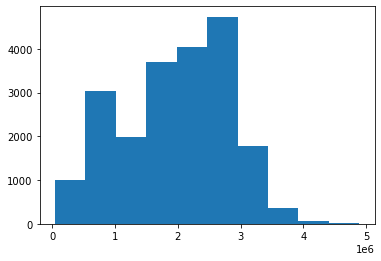

In [116]:
diffs = np.array(diffs)
plt.hist(diffs)[0][0]

In [14]:
[1,2,3][:-1]

[1, 2]

In [2]:
BLENDER_MEMBANK_ROOT

'/media/ssd2/blender_membank_frameskip'

In [18]:
a = np.random.randn(3,5)
a

array([[ 1.36844168,  0.6310768 ,  0.17914825, -1.80550664,  0.64492095],
       [-0.06958051,  0.34388669, -0.08081766,  0.03122397, -1.21903979],
       [-0.11555772,  1.17399775, -1.4737343 ,  0.64077041,  0.16667692]])

In [19]:
a[a<0] *= 10

In [20]:
a

array([[  1.36844168,   0.6310768 ,   0.17914825, -18.05506636,
          0.64492095],
       [ -0.69580511,   0.34388669,  -0.80817657,   0.03122397,
        -12.19039788],
       [ -1.15557718,   1.17399775, -14.737343  ,   0.64077041,
          0.16667692]])

In [22]:
np.clip(a, 0, 1)

array([[1.        , 0.6310768 , 0.17914825, 0.        , 0.64492095],
       [0.        , 0.34388669, 0.        , 0.03122397, 0.        ],
       [0.        , 1.        , 0.        , 0.64077041, 0.16667692]])

In [2]:
# Remove SSD trash
os.system(f"rm -r {SSD_ROOT}/.Trash-1000/files/*")

0

In [23]:
moving_average(np.array([0,1.1,2,3.5,4.9,5,6,7,8,9,10,11,12,13]),w=5)

array([ 0.  ,  1.1 ,  2.3 ,  3.3 ,  4.28,  5.28,  6.18,  7.  ,  8.  ,
        9.  , 10.  , 11.  , 12.  , 13.  ])

In [12]:
import math
original_angle = .03
road_roll = .03
new_angle = original_angle - math.atan(road_roll)
new_angle

8.995143122098731e-06

In [13]:
math.atan(.1)

0.09966865249116204

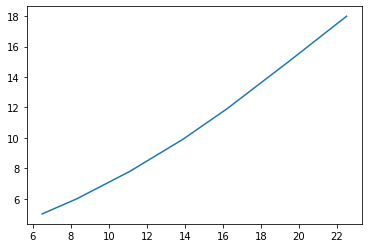

In [12]:
"""min_dist_lookup = [ 
    (6.5, 4.), # 14.5 mph
    (8.33, 5.0), #18 mph (speed mps, wp dist m)
    (11.11, 6.7), # 24 mph
    (13.89, 8.5), # 30 mph
    (16.2, 10.1), # 36 mph
    (19.44, 12.6), # 43 mph
    (22.5, 15.), # 50 mph
]"""
min_dist_lookup = [ 
    (6.5, 5.), # 14.5 mph
    (8.33, 6.0), #18 mph (speed mps, wp dist m)
    (11.11, 7.8), # 24 mph
    (13.89, 9.9), # 30 mph
    (16.2, 11.9), # 36 mph
    (19.44, 15), # 43 mph
    (22.5, 18.), # 50 mph
]

min_dist_bps = [x[0] for x in min_dist_lookup]
min_dist_vals = [x[1] for x in min_dist_lookup]

plt.plot(min_dist_bps, min_dist_vals)


In [ ]:
min_dist_lookup = [ # 3.29
    (6.5, 4.), # 14.5 mph
    (8.33, 5.1), #18 mph (speed mps, wp dist m)
    (11.11, 6.5), # 24 mph
    (13.89, 8), # 30 mph
    (16.2, 9.3), # 36 mph
    (19.44, 11.5), # 43 mph
    (22.5, 13.5), # 50 mph
]

In [7]:
np.tan(.5)

0.5463024898437905

In [54]:
tire_angle = .4
WHEELBASE = 1.8 #2.66
speed = mph_to_mps(10)

curvature = tire_angle/WHEELBASE # rad/m 
vehicle_turn_rate_sec = curvature * speed # rad/sec
future_vehicle_heading = vehicle_turn_rate_sec * .05
future_vehicle_heading

0.04967111111111111

In [55]:
dist_car_travelled_during_lag = speed / 20.
dist_car_travelled_during_lag

0.22352

In [56]:
r = dist_car_travelled_during_lag / future_vehicle_heading # radius of the circle around which ego is turning m/rad
r

4.5

In [57]:
# correct way
future_vehicle_y = np.sin(future_vehicle_heading)*r
future_vehicle_x = r - (np.cos(future_vehicle_heading)*r)
future_vehicle_x, future_vehicle_y

(0.005550102127081402, 0.22342809919549694)

In [58]:
a = future_vehicle_heading/2
x = dist_car_travelled_during_lag*np.cos(a)
y = (dist_car_travelled_during_lag*np.sin(a))
x, y

(0.2234510694365123, 0.005550672723098684)

In [11]:
4/6.5

0.6153846153846154

In [4]:
mps_to_mph(6.7)

14.987498000000002

In [19]:
ACCELERATION_DUE_TO_GRAVITY = 9.8
roll = .03
sf = 1/401
u = 20

m = 1700
l = 2.66
aF = l * .41
aR = l - aF
tire_stiffness_factor = .677
cF, cR = tire_stiffness_factor, tire_stiffness_factor
sf = m * (cF*aF - cR*aR) / (l**2 * cF * cR)

In [22]:
(cF*aF - cR*aR)

-0.3241476

In [20]:
sf

-169.92259081973765

In [21]:
roll_compensation = (ACCELERATION_DUE_TO_GRAVITY * roll) / ((1 / sf) - u**2)
#roll_compensation = (ACCELERATION_DUE_TO_GRAVITY * roll) / u**2
roll_compensation

-0.0007349891864115468

In [197]:
roll_compensation_angles = CRV_WHEELBASE * roll_compensation
roll_compensation_angles

0.0019551

In [198]:
from traj_utils import *
tire_angles_to_max_speeds(.02), tire_angles_to_max_speeds(.02-roll_compensation_angles)

(14.18929668510425, 14.934187811096537)

In [3]:
# set lr
set_lr(1e-4)

In [37]:
dataloader_root = f"{BLENDER_MEMBANK_ROOT}/dataloader_06"
current_run = np.load(f"{dataloader_root}/run_counter.npy")[0]
current_run

40